Wasp 121. There is a lot of archival data (transit obs) but it may be quite bad. We have G140L data

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [135]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/'
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/was

(1e-17, 1.748718222312521e-12)

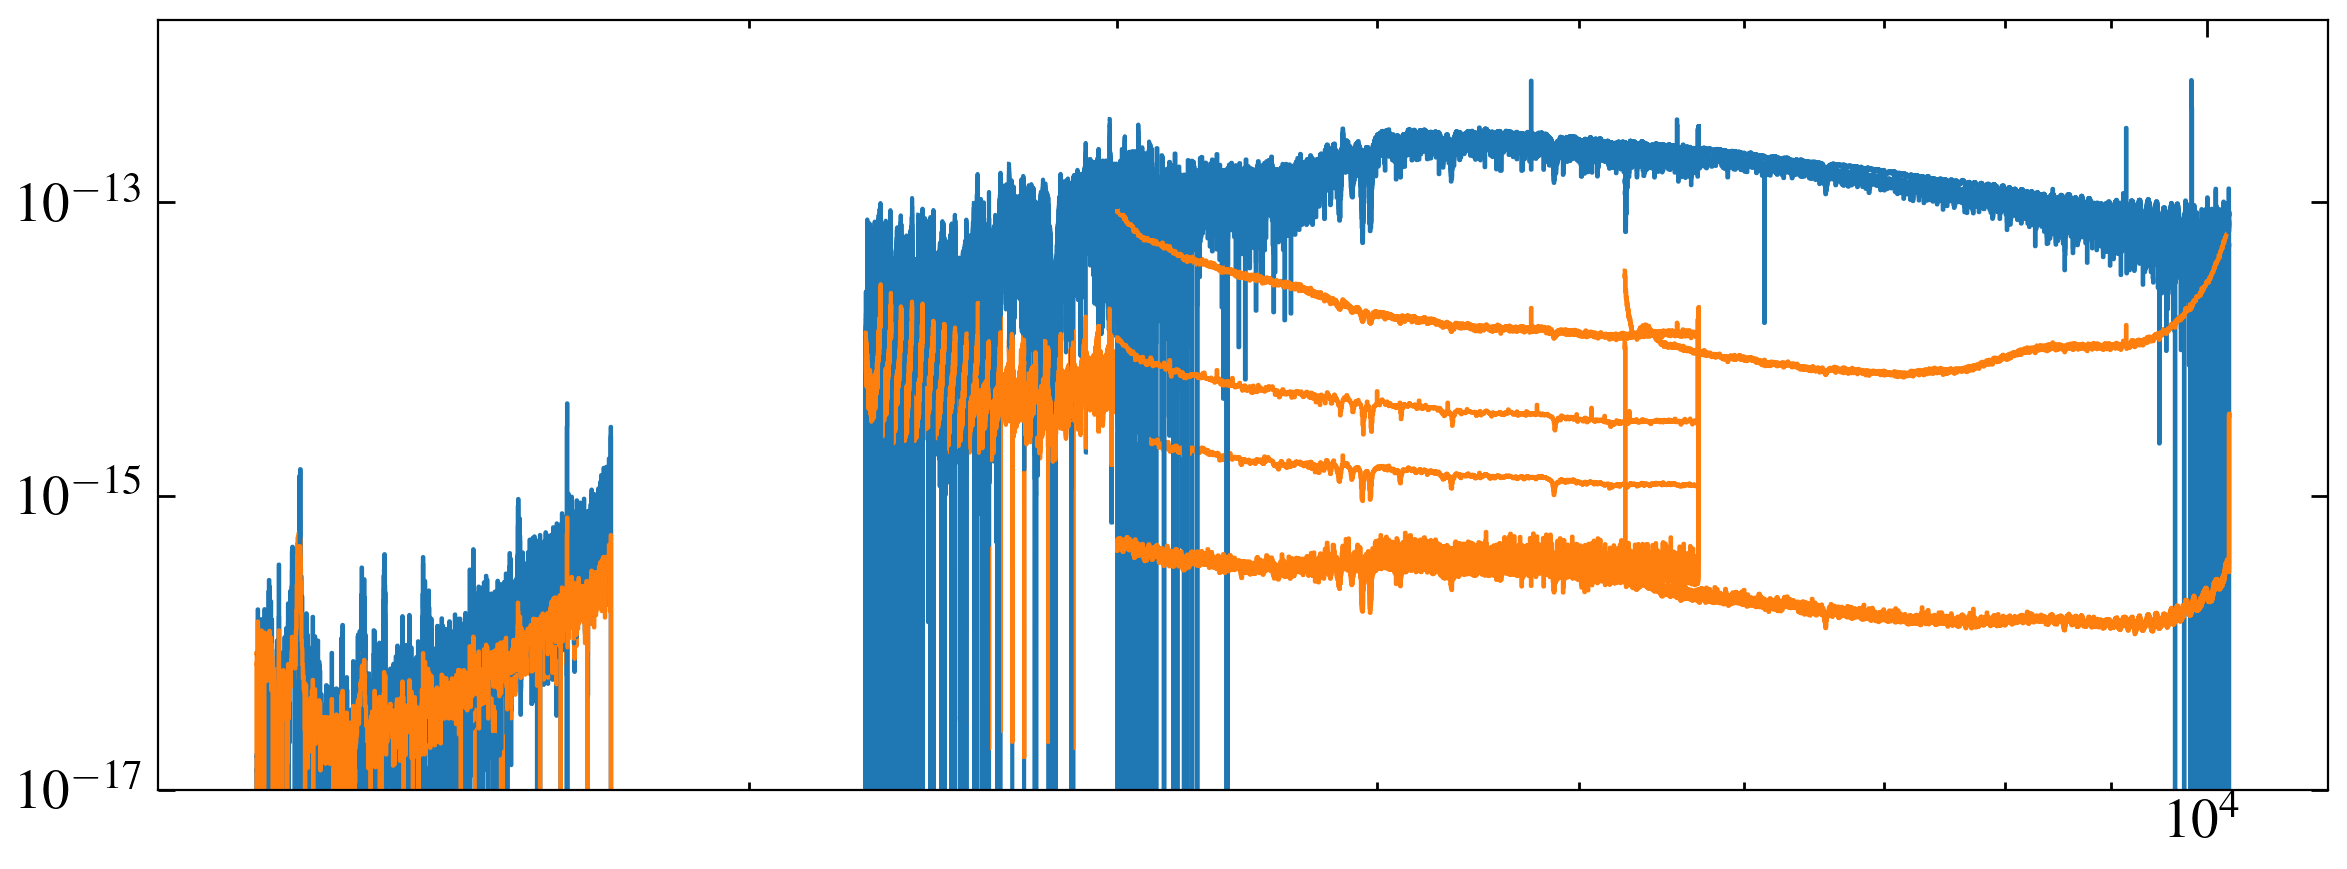

In [136]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        if grating == 'G430L':
            mask = w > 3000
        else:
            mask = w > 1160
        
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1')
    # plt.show()

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17)

G140l first, then see what we can build out of the archival spectra

In [137]:
g140l = []
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        g140l.append(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32010_x1d.fits
[96.89902]


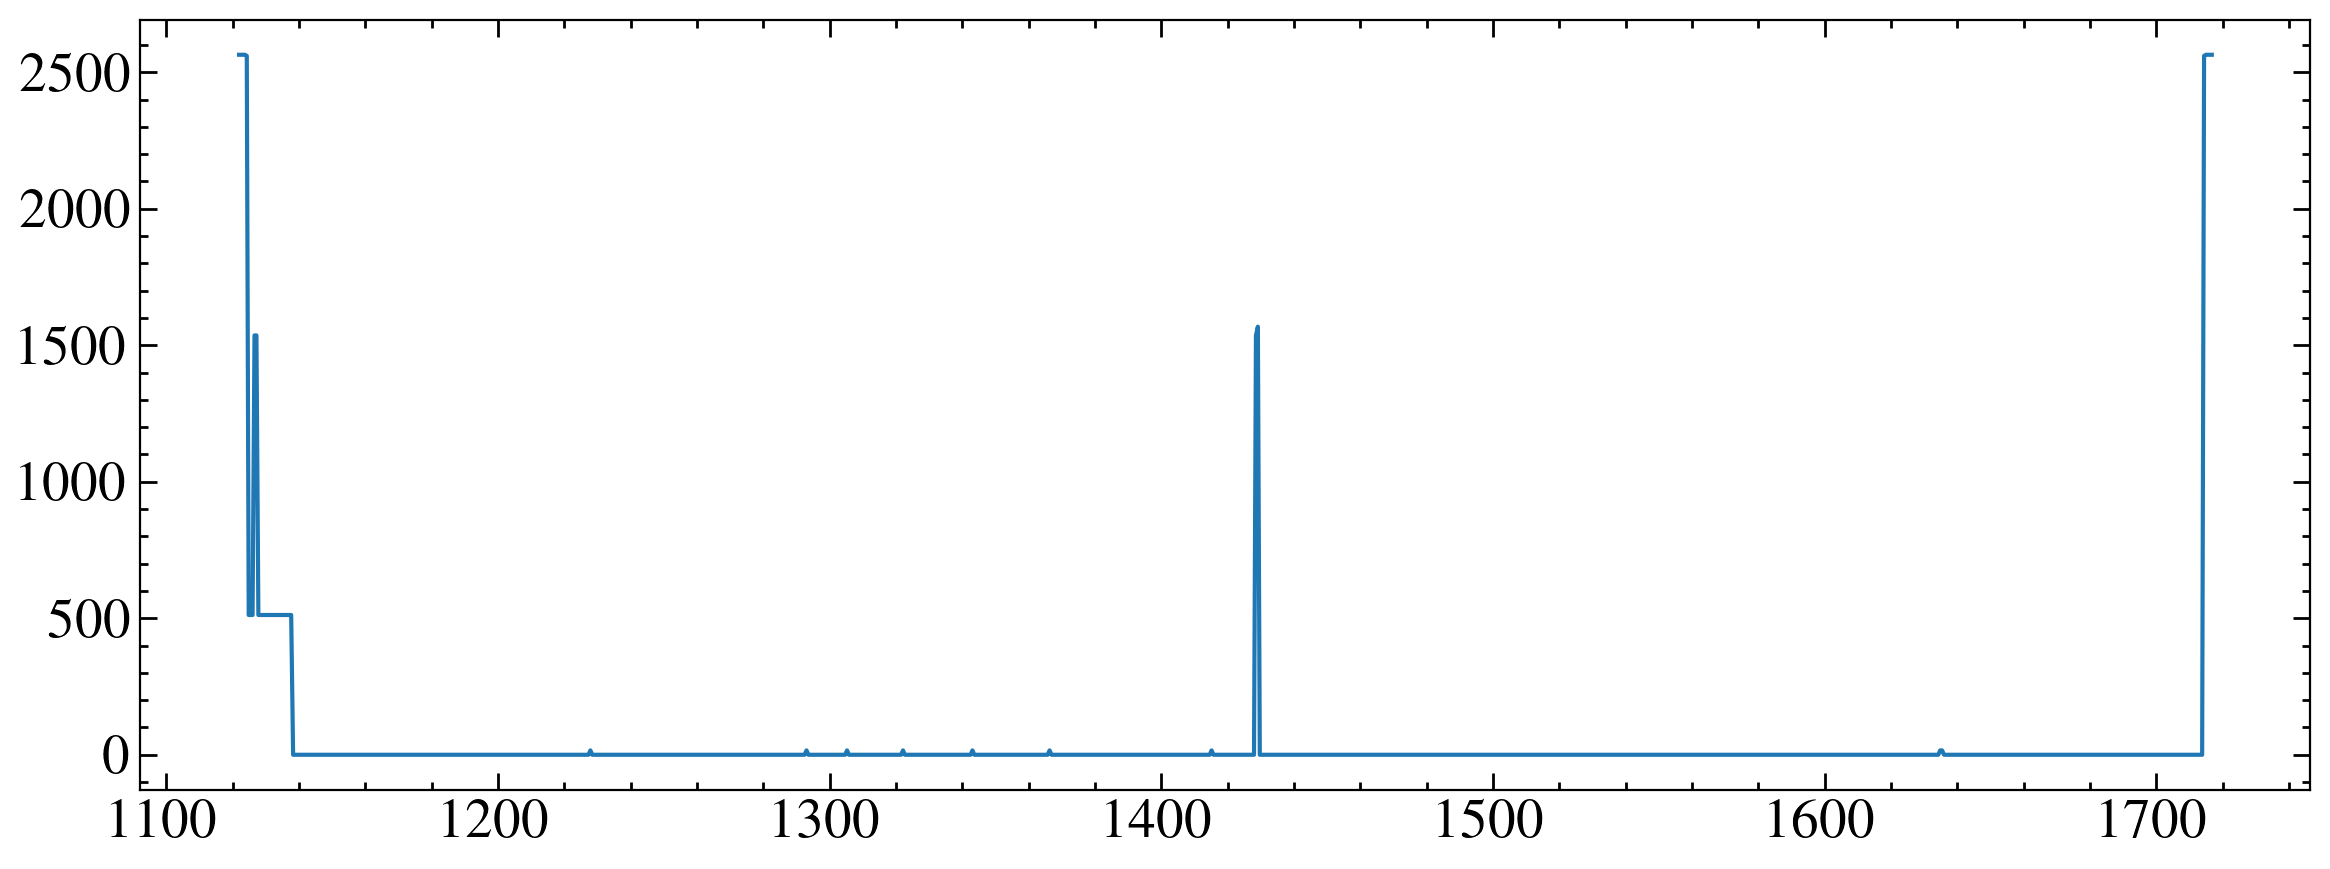

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32020_x1d.fits
[97.24248]


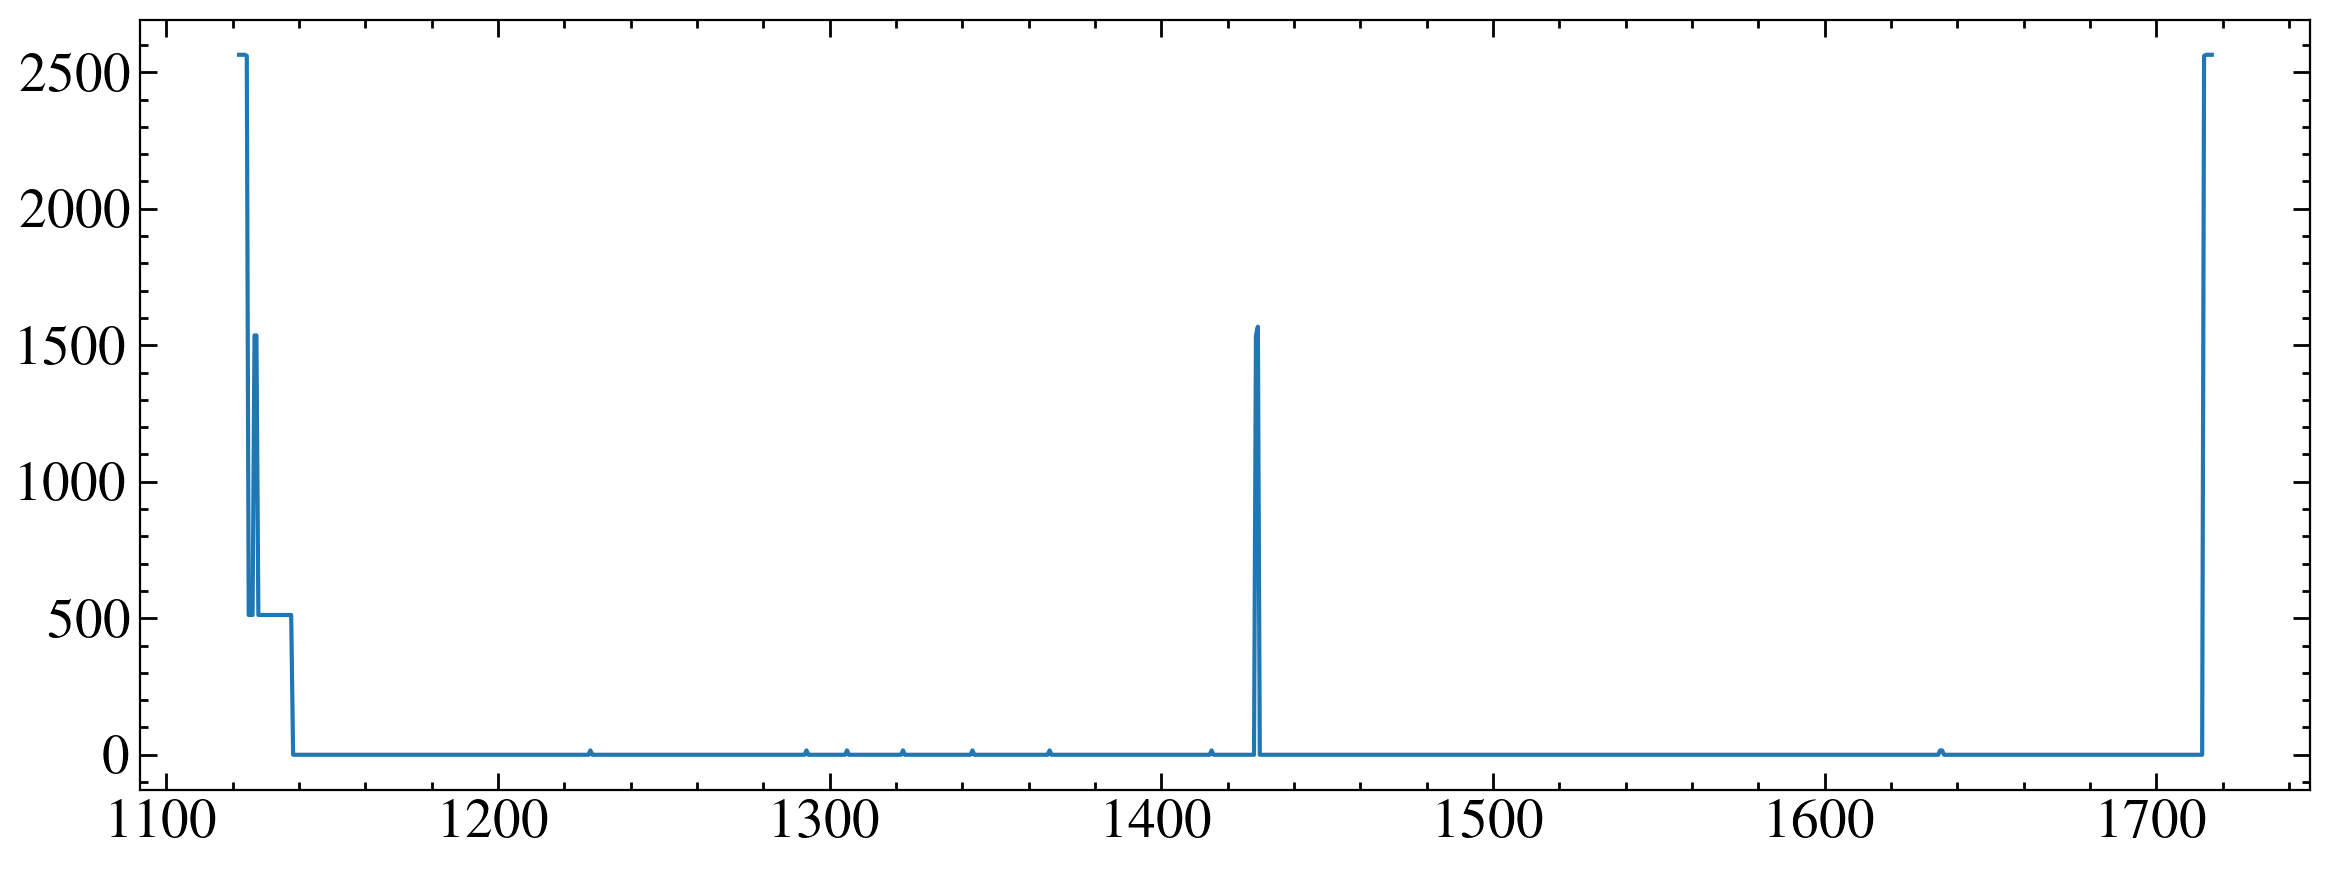

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32030_x1d.fits
[97.10264]


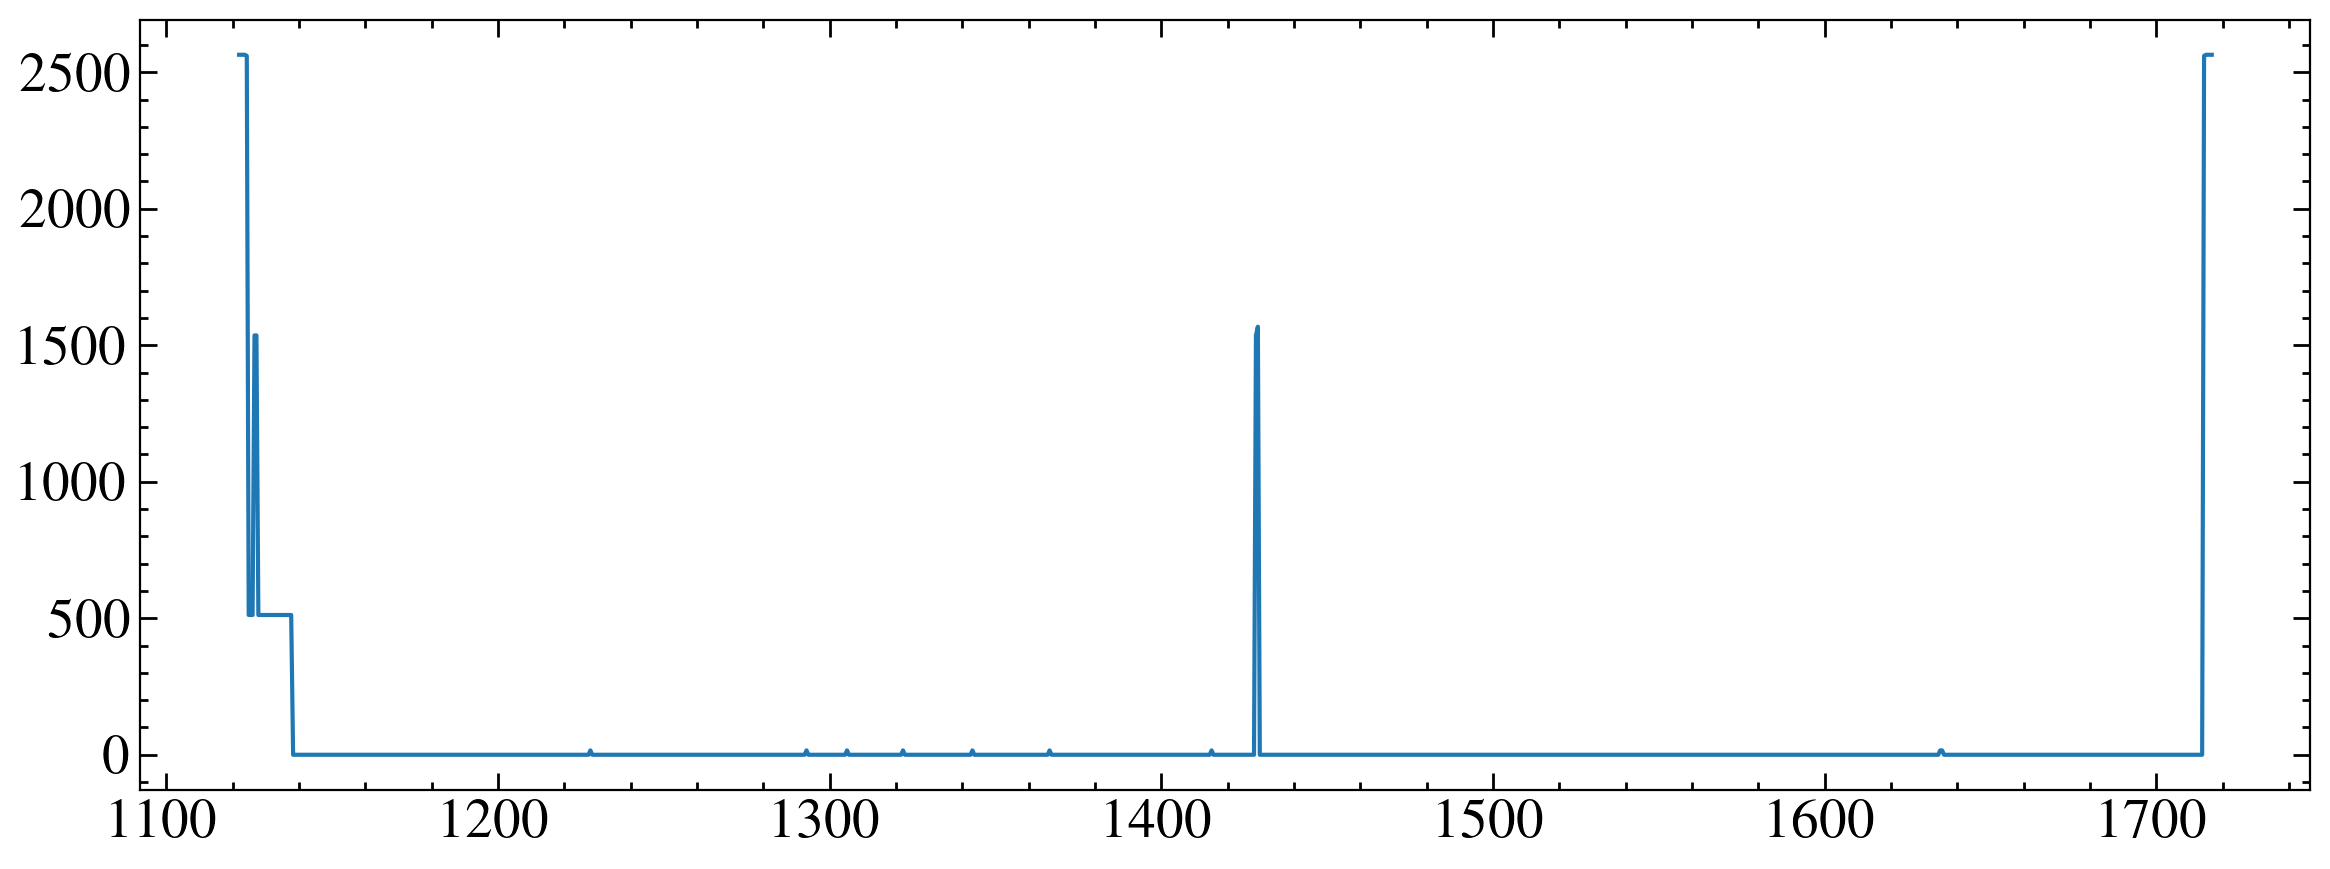

In [138]:
for x in g140l:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e, dq= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
        if grating == 'G430L':
            mask = w > 3000 
        else:
            mask = (w > 1160) & (dq ==0)
        
        # w, f, e = w[mask], f[mask], e[mask]
        # plt.step(w, f, where='mid', c='C0')
        # plt.step(w, e, where='mid', c='C1')
        plt.plot(w, dq)
    plt.show()

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-17)

/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/astropy/stats/funcs.py:702: RuntimeWarning: invalid value encountered in sqrt
  [n + 0.5 - np.sqrt(n + 0.25), n + 0.5 + np.sqrt(n + 0.25)]
/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


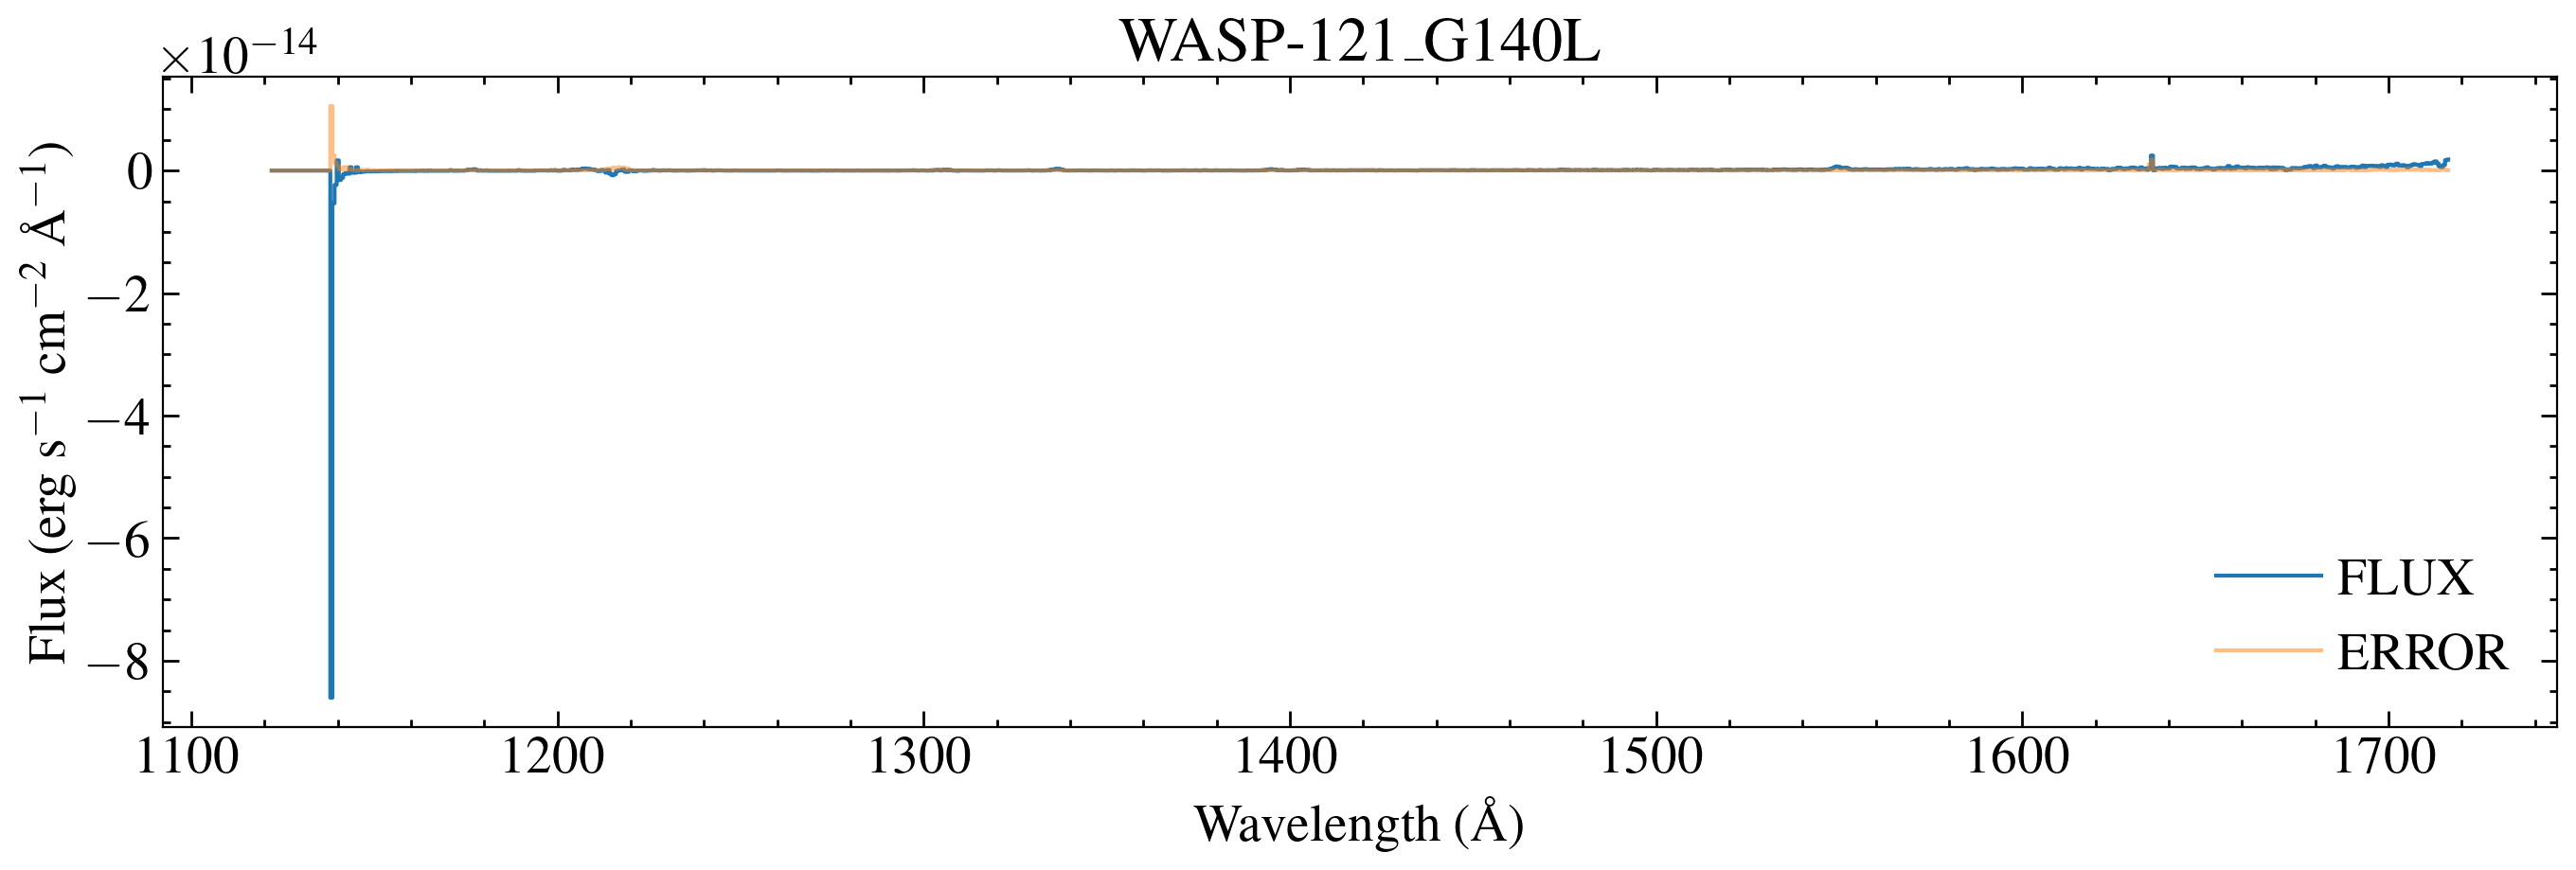

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


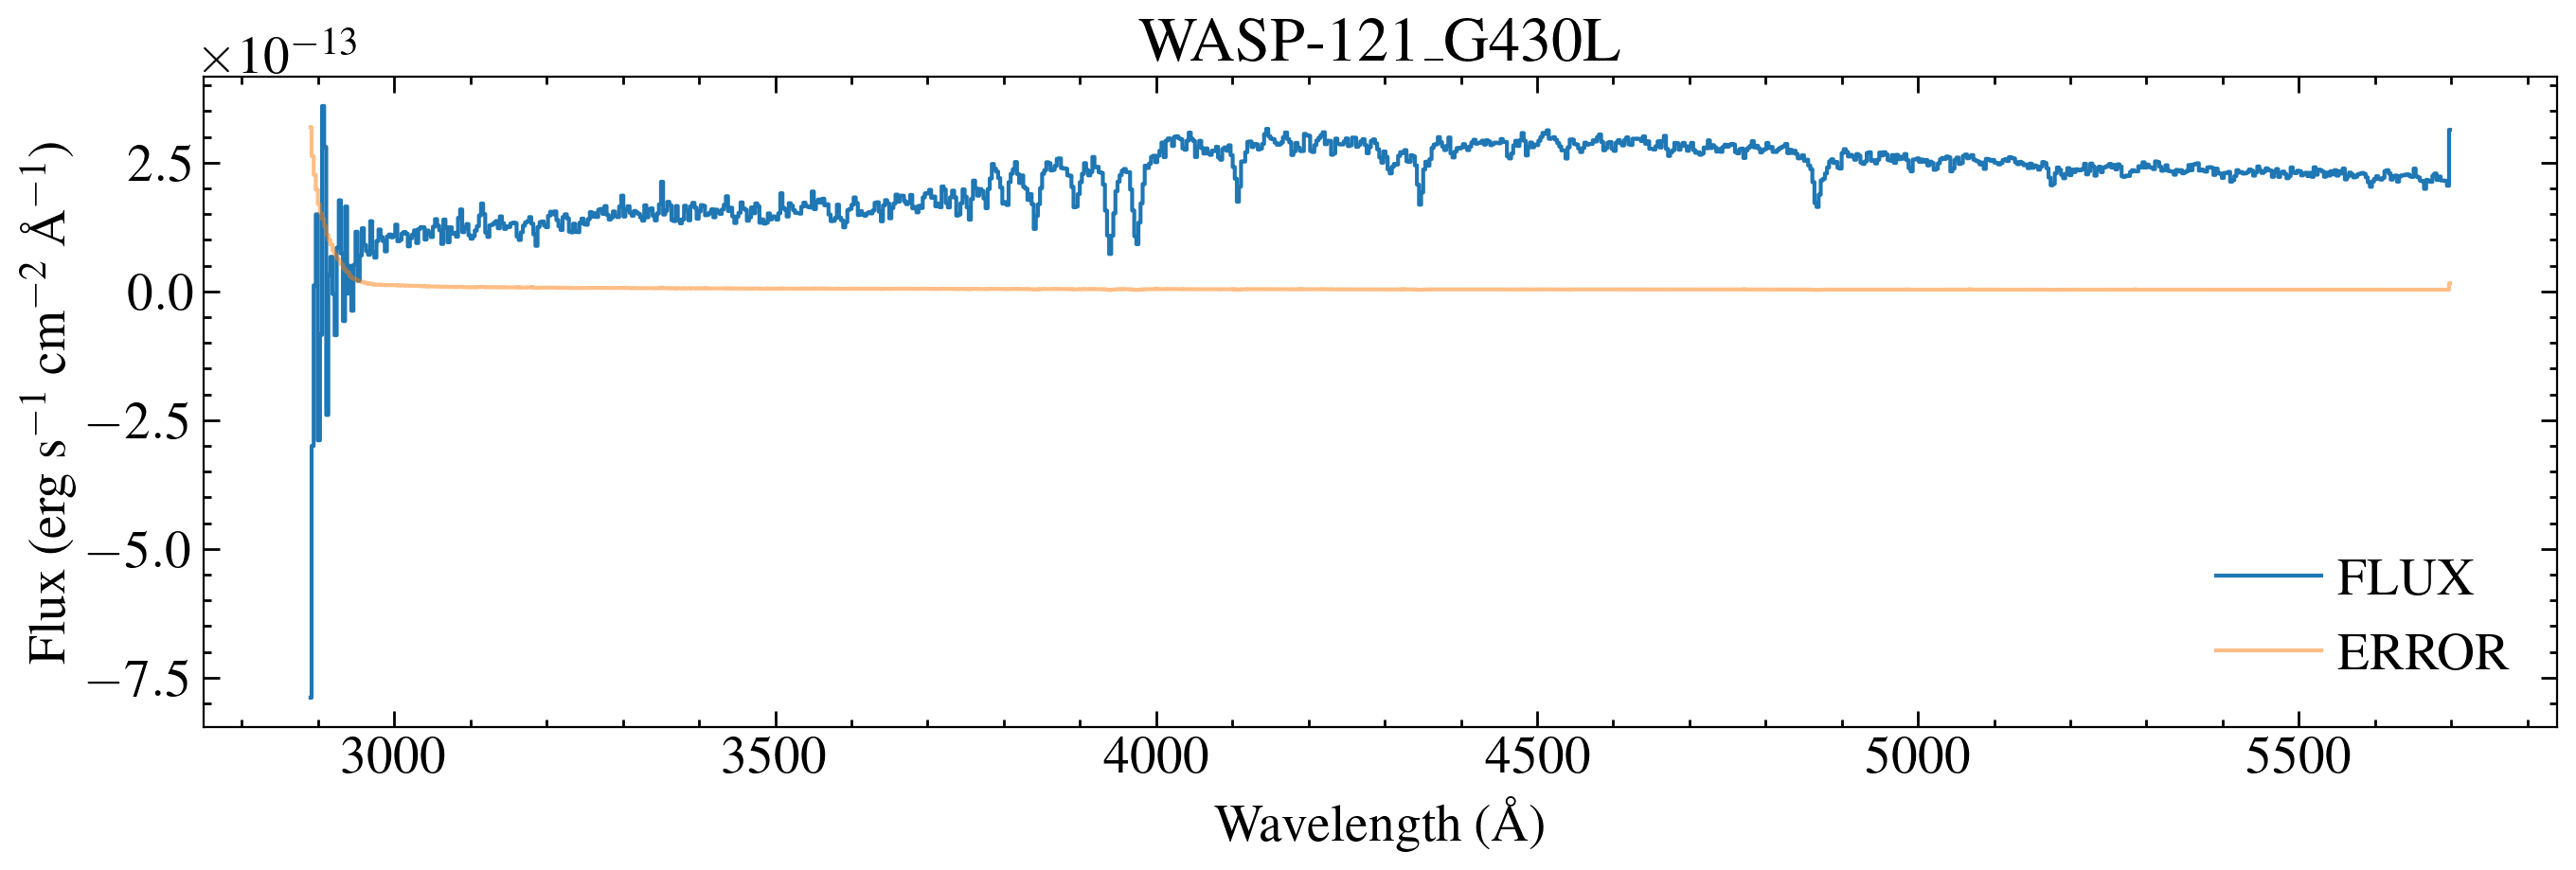

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits


In [139]:
import importlib
import prepare_stis
importlib.reload(prepare_stis)
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/use_x1ds/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

In [140]:
g430l = glob.glob('{}oeoo*sx1.fits'.format(path))
# for x in g430l:
#     print(x)
#     grating = fits.getheader(x, 0)['OPT_ELEM'] 
#     # print(fits.getheader(x, 0)['OPT_ELEM'])
#     data = fits.getdata(x, 1)
#     print(data['A2Center'])
#     # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     for dt in data:
#         w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
#         if grating == 'G430L':
#             mask = w > 3000
#         else:
#             mask = w > 1160
        
#         w, f, e = w[mask], f[mask], e[mask]
#         plt.step(w, f, where='mid', c='C0')
#         plt.step(w, e, where='mid', c='C1')
#     plt.show()


In [141]:
hlsp = glob.glob('draft_hlsp/wasp-121/*')
hlsp

['draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits']

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits


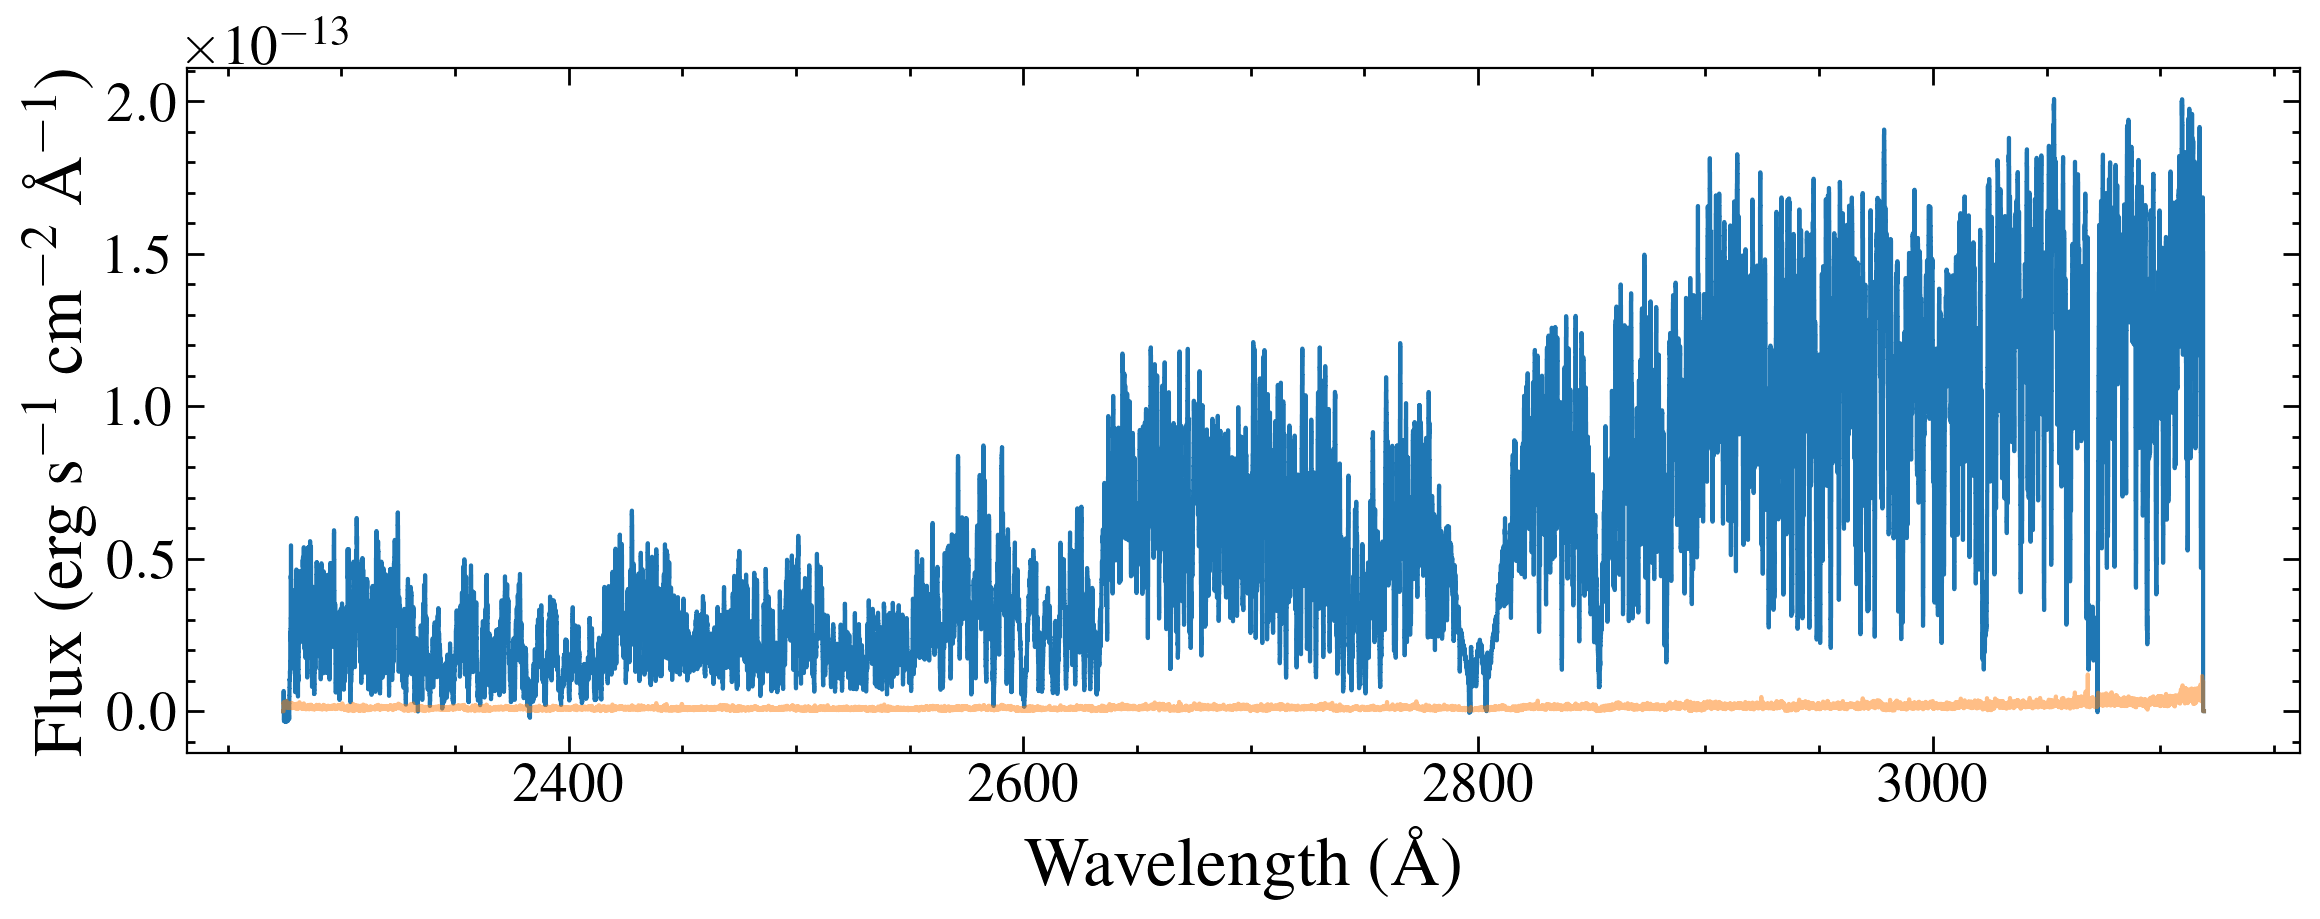

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits


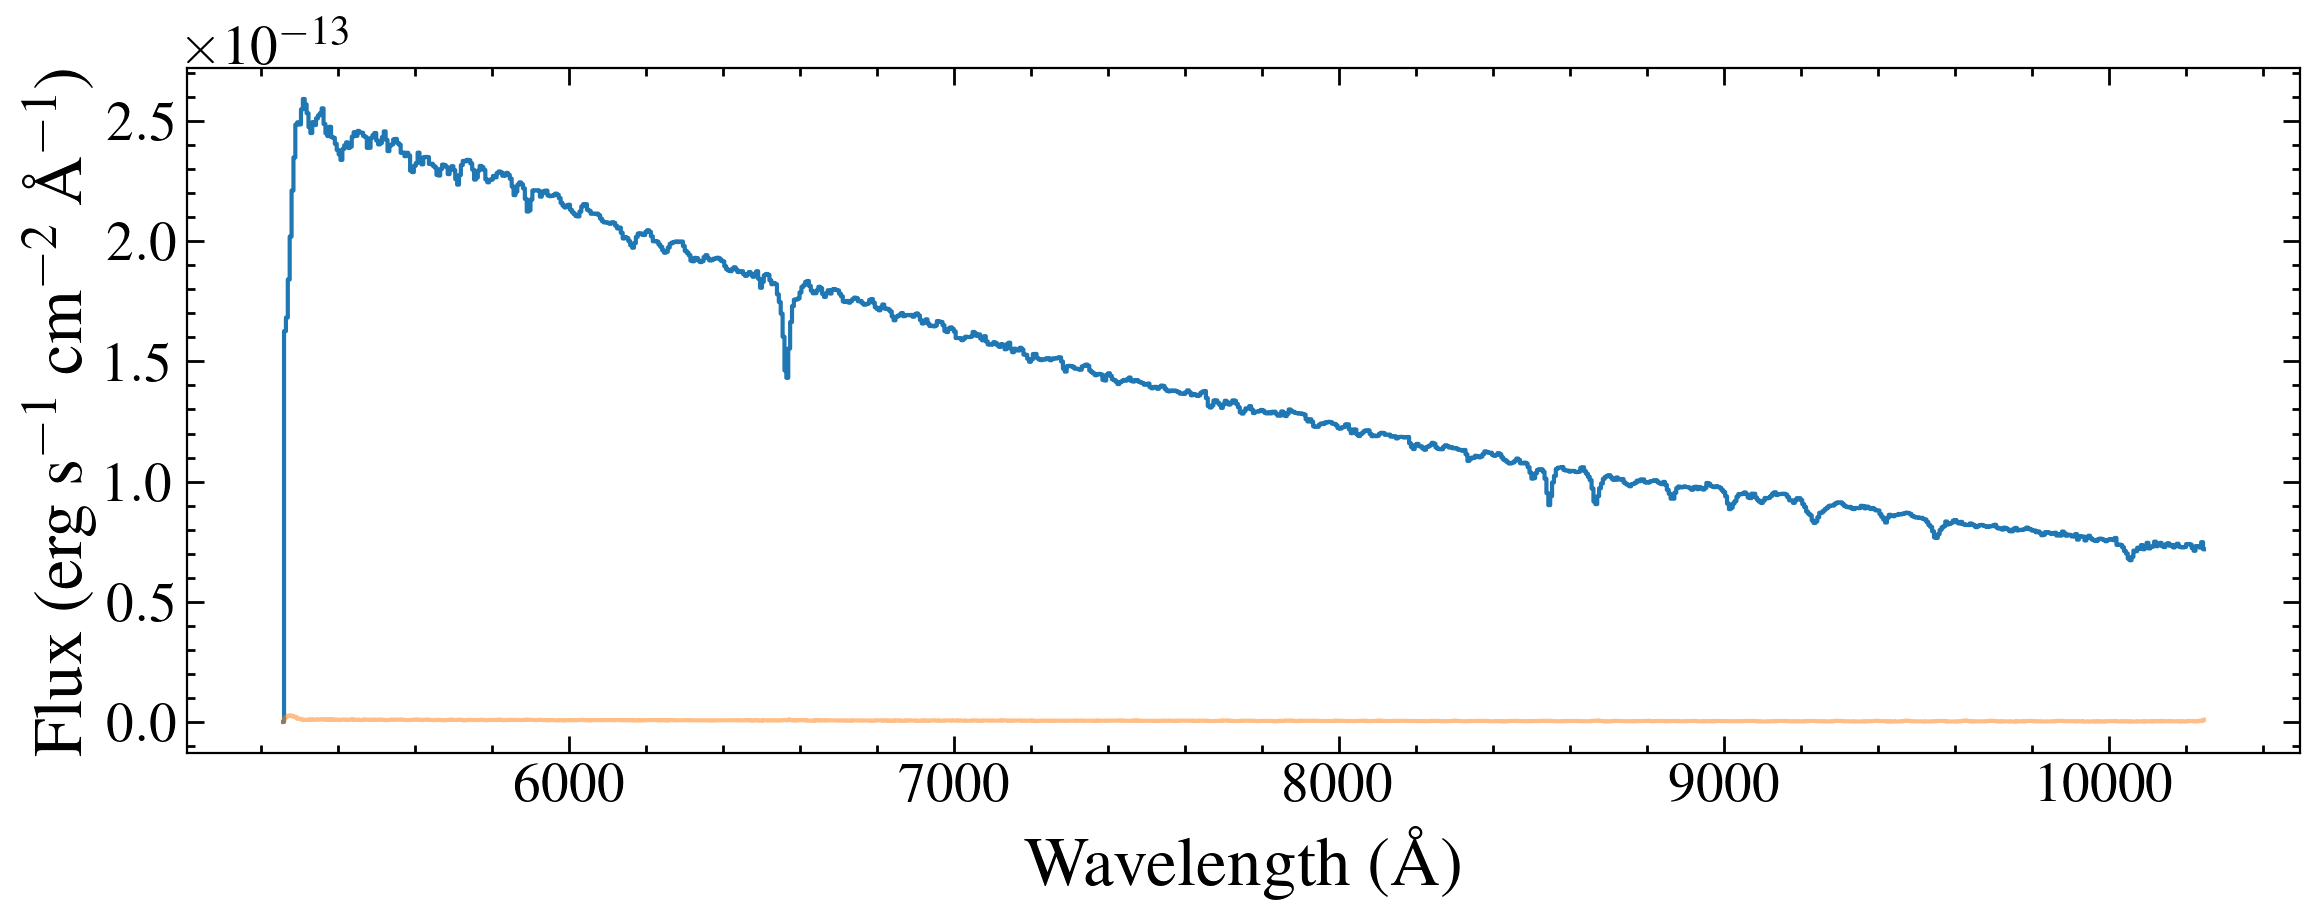

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


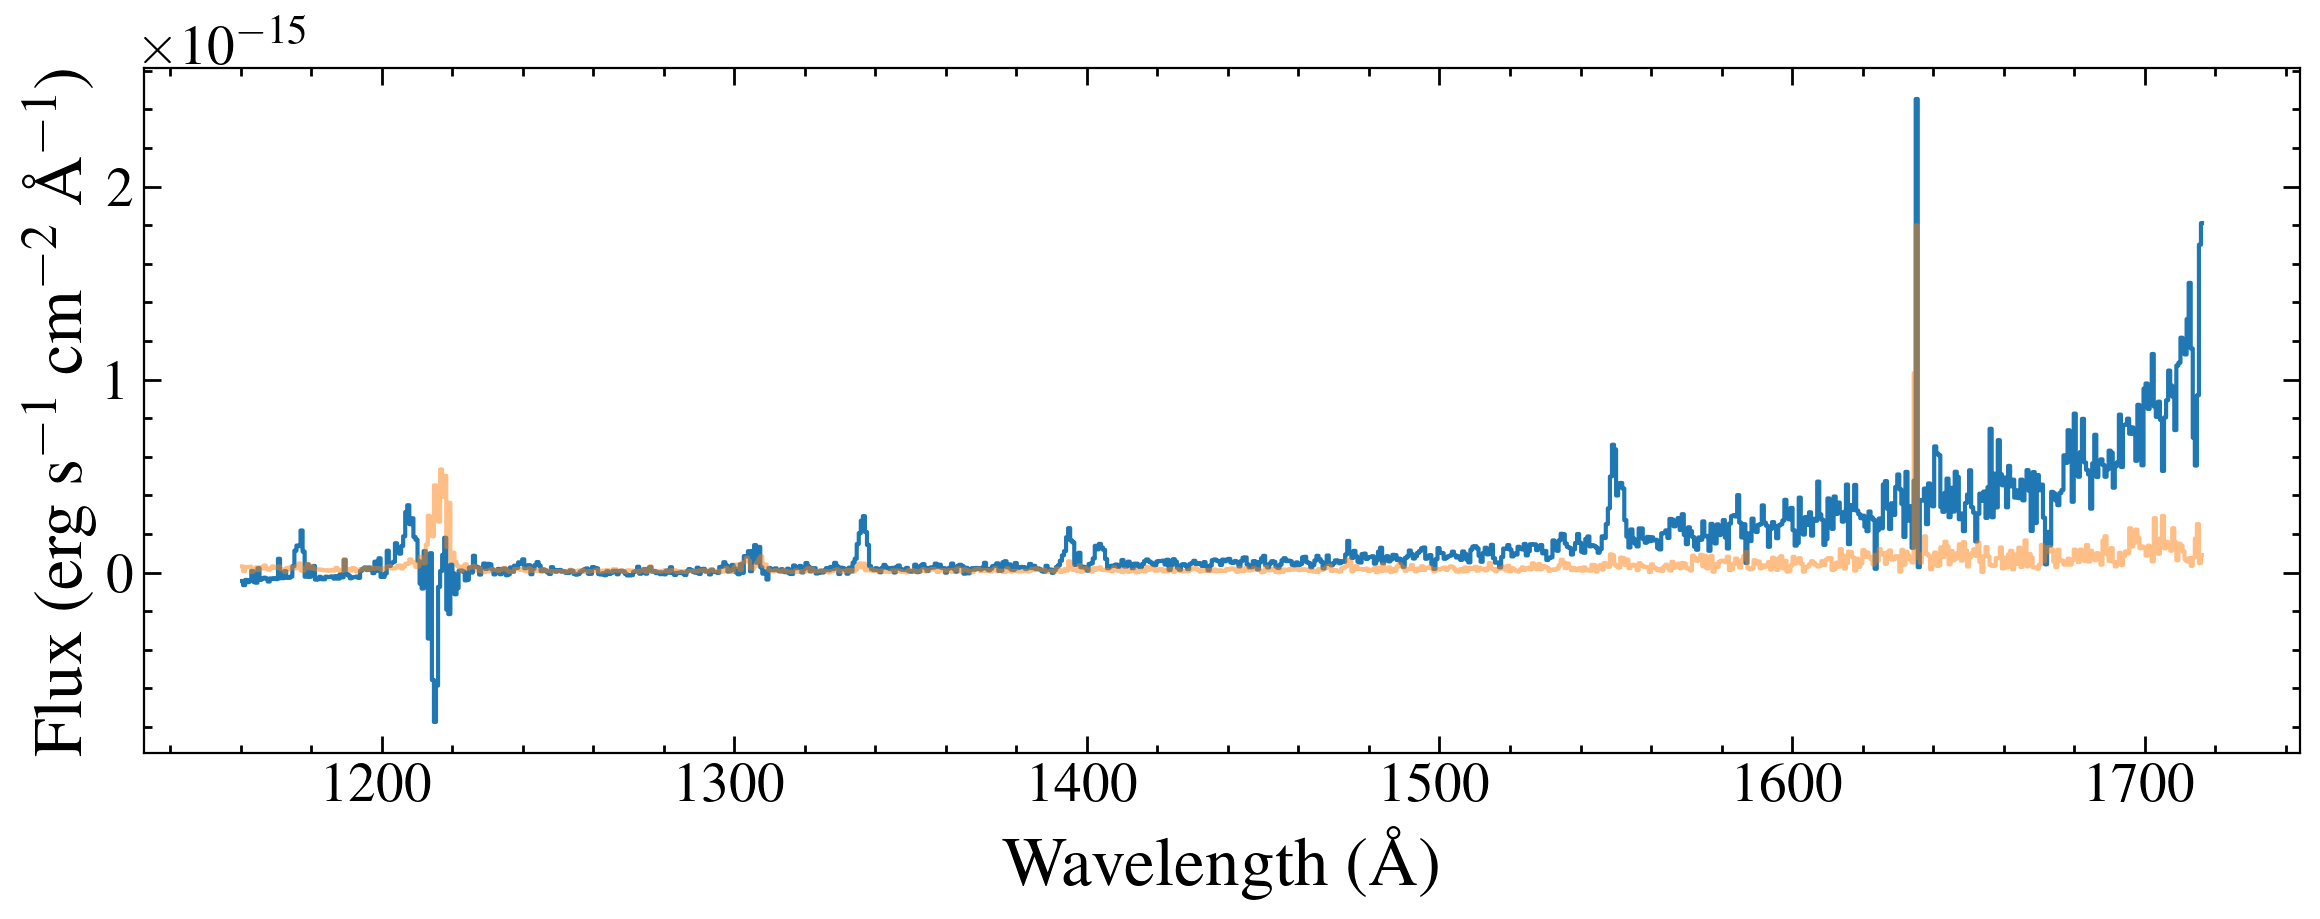

In [142]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.show()
    

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits
10.0


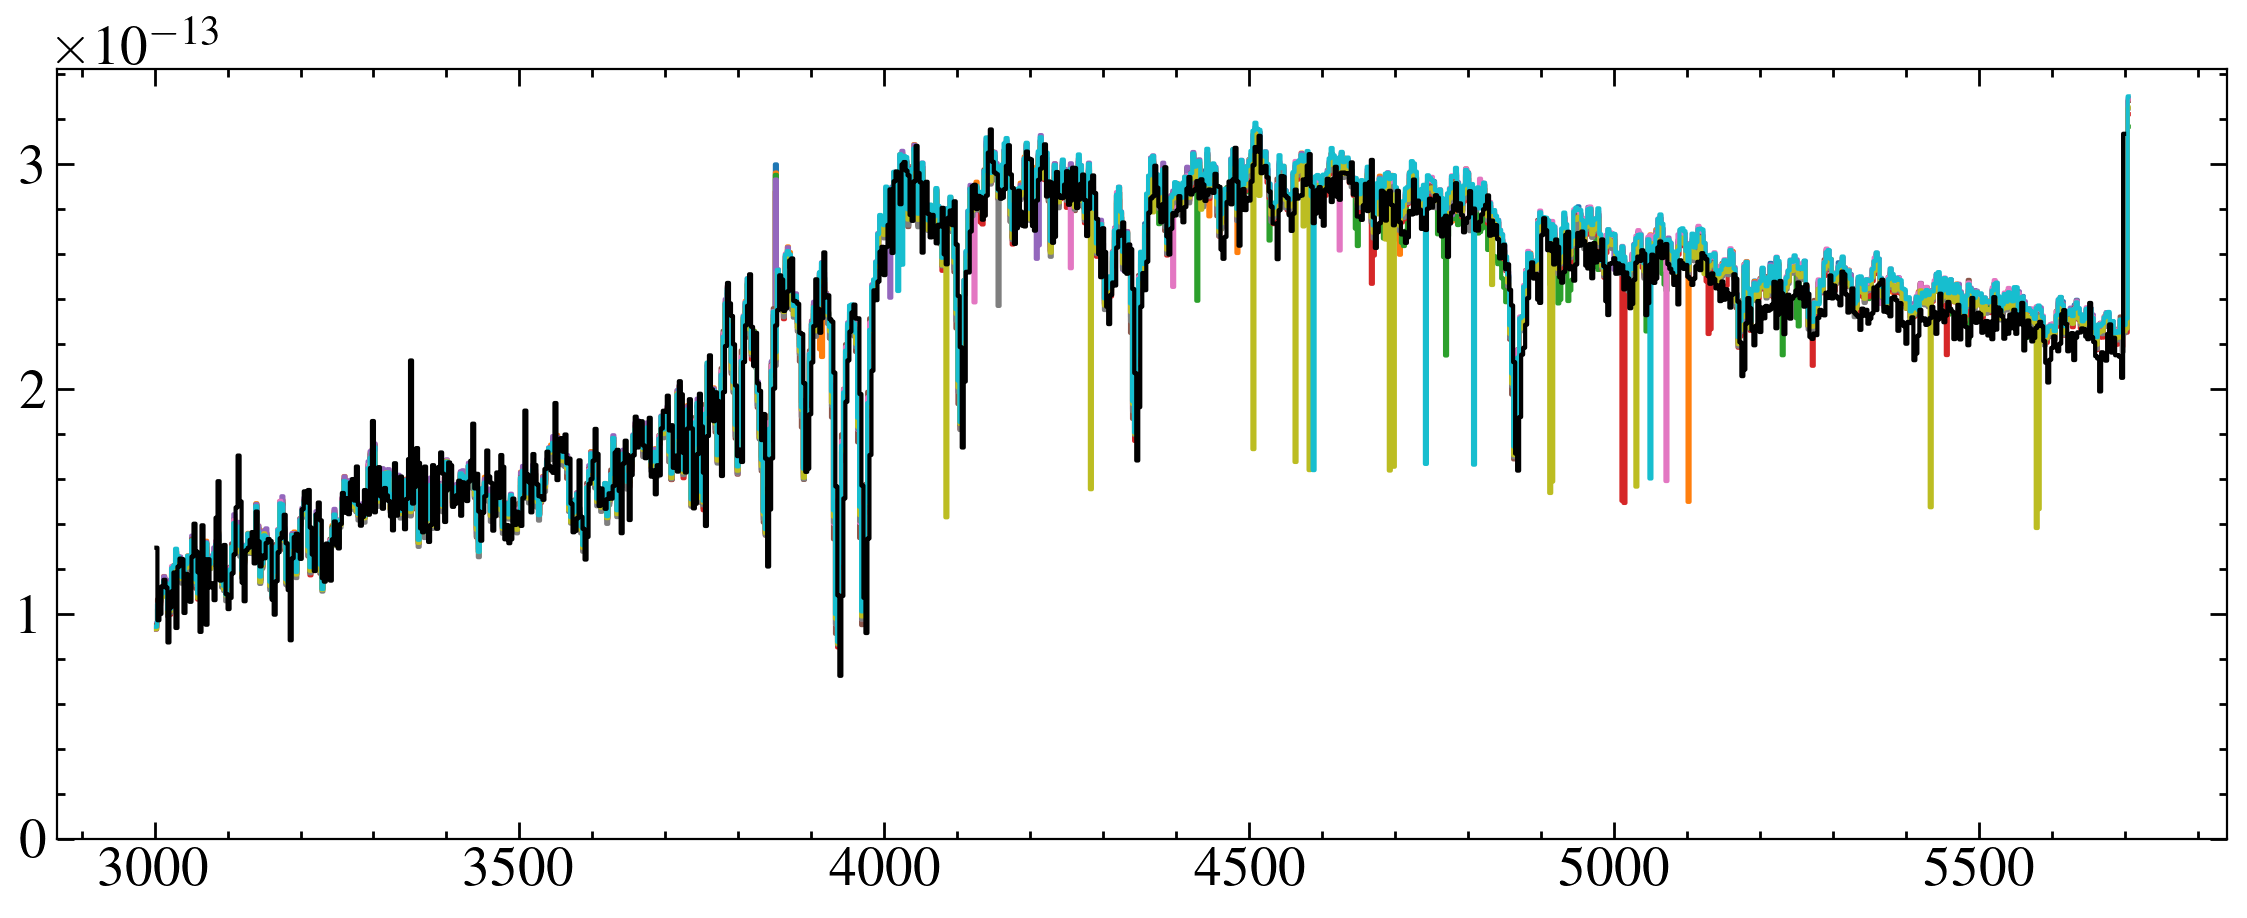

In [143]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating in ['G430L']:#, 'G750L']:
        # print(fits.getheader(x, 0)['OPT_ELEM'])
        data = fits.getdata(x, 1)
#         print(fits.getheader(x, 0)['TEXPTIME'])
#         print(fits.getheader(x, 0)['APERTURE'])
        if fits.getheader(x, 0)['TEXPTIME'] > 2000:
            # print(data['A2Center'])
            # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
            for dt in data:
                w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
                if grating == 'G430L':
                    mask = w > 3000
                else:
                    mask = w > 1160

                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w, f, where='mid')
                # plt.step(w, e, where='mid', c='C1')
            # plt.show()

        # plt.yscale('log')
        # plt.xscale('log')
plt.ylim(0)

for x in hlsp[0:1]:
    print(x)
    # fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    print(data['EXPTIME'][30])
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='k')
    # plt.step(w, e, where='mid', c='C1', alpha=0.5)
    # plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    # plt.xlabel('Wavelength (\AA)', size=25)
    # plt.tight_layout()
    plt.show()
    
w_opt, f_opt, e_opt =  w, f, e 

In [144]:
fits.getheader(x, 0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'G430L   '                                                            
APERTURE= '52X0.2  '                                                            
TARGNAME= 'WASP-121'                                                            
RA_TARG =       107.6002227084                                                  
DEC_TARG=      -39.09721845808                                                  
PROPOSID=                16701                                                  
HLSPNAME= 'MUSCLES Extension

In [145]:
x

'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits'

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits


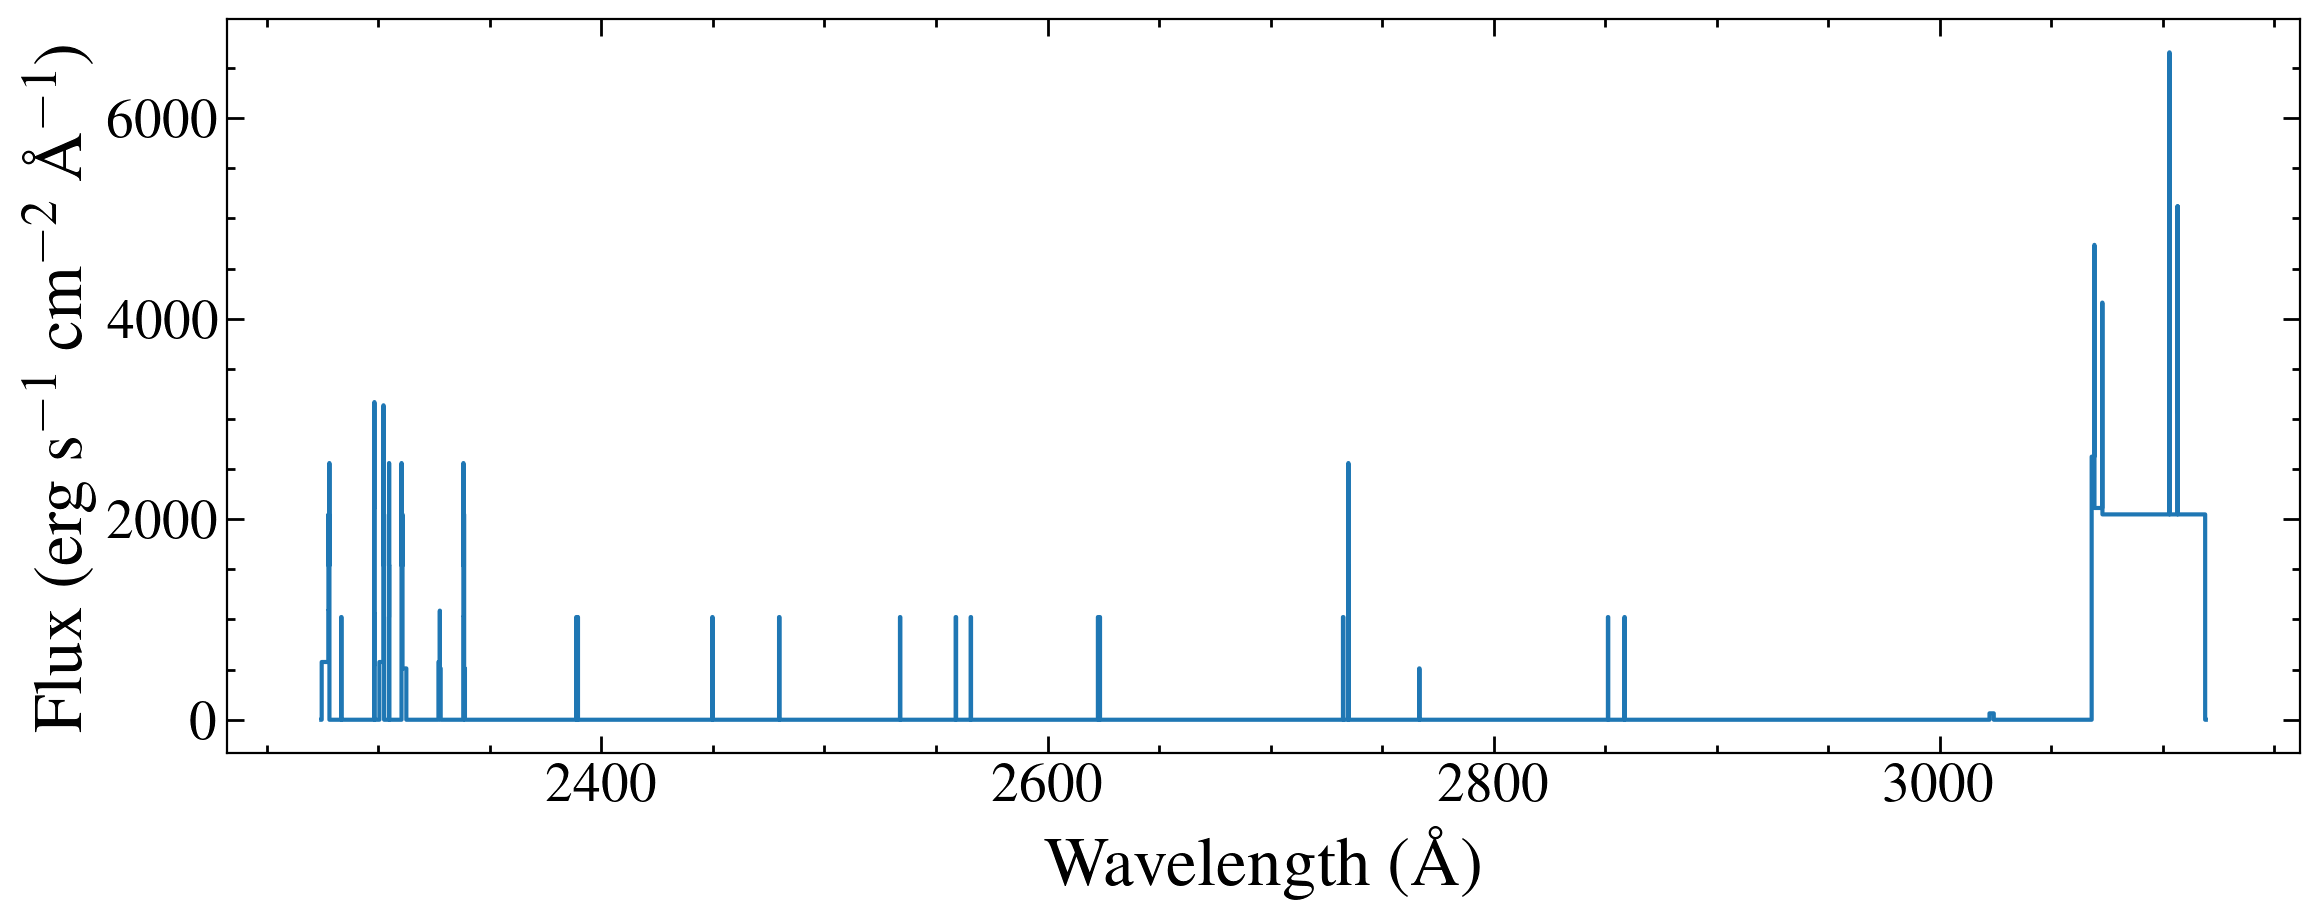

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits


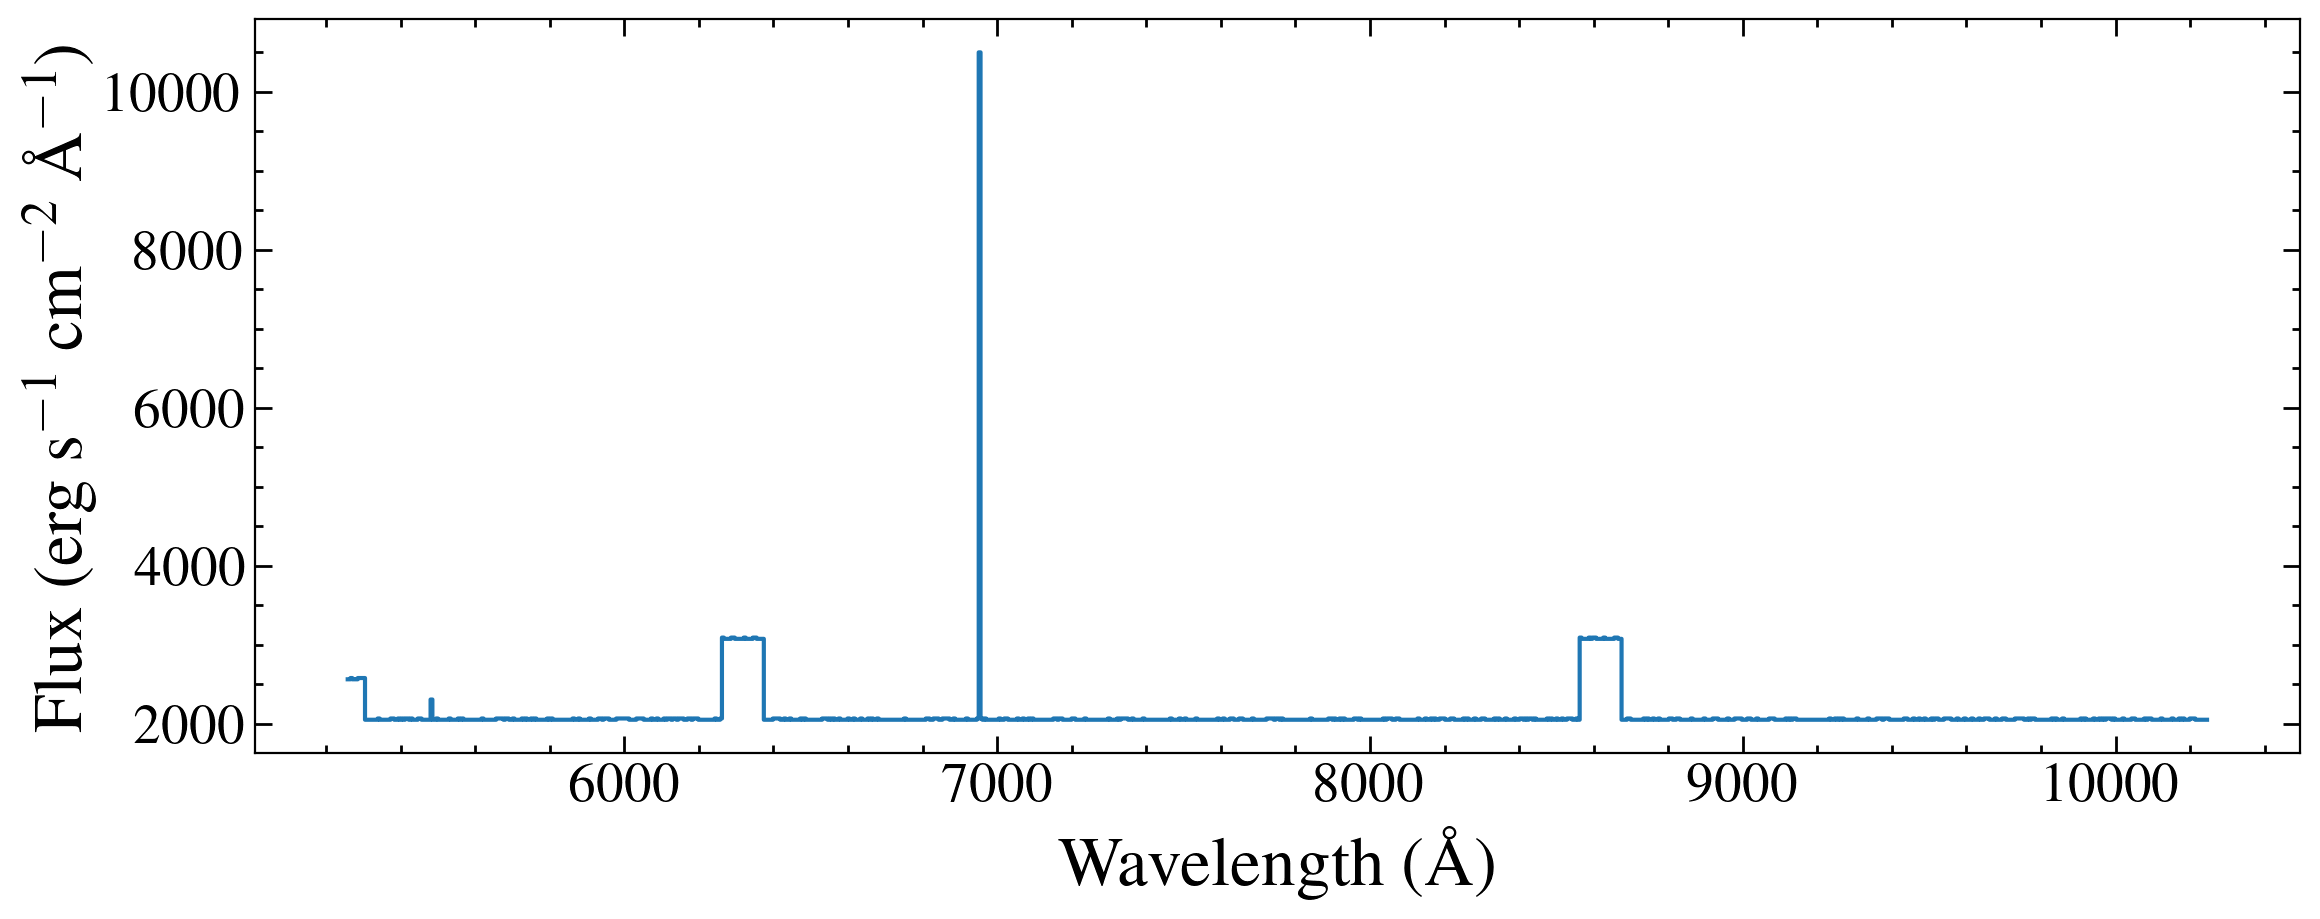

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


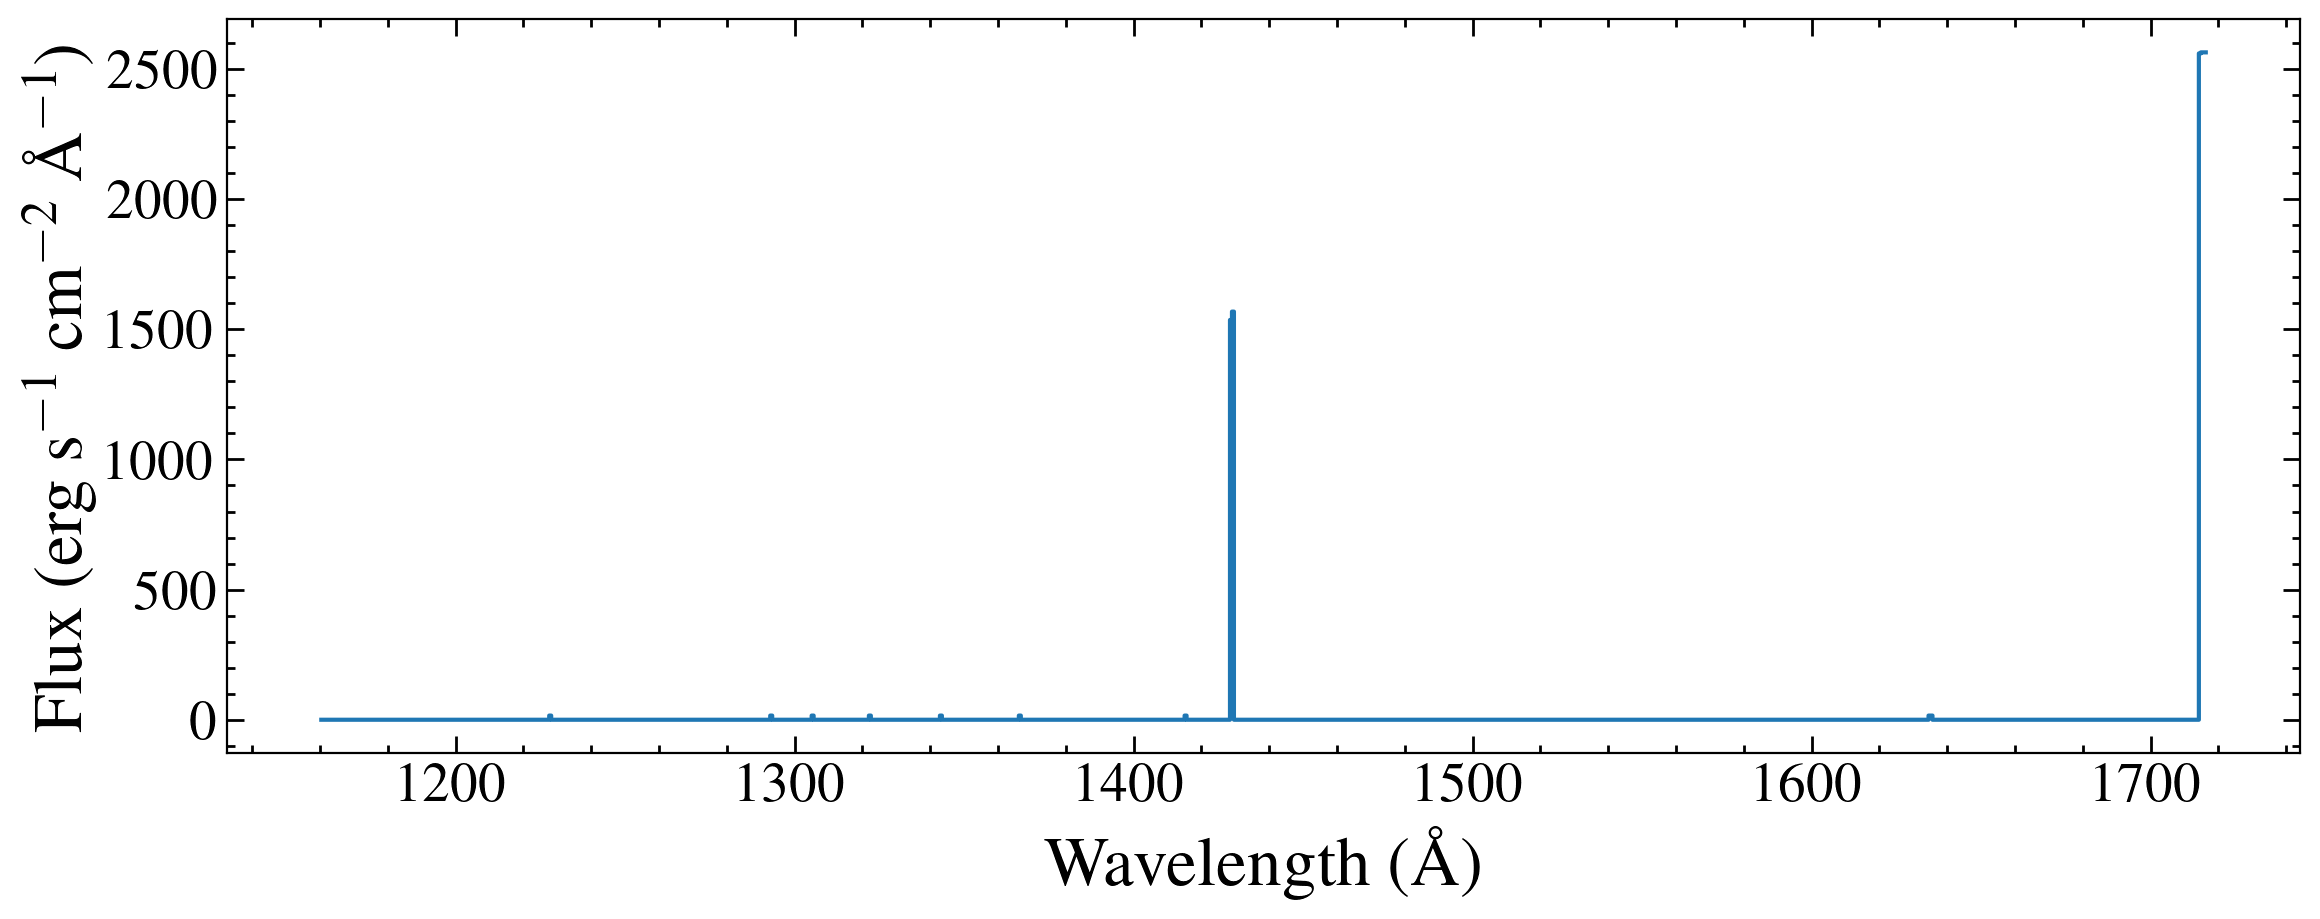

In [146]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e, dq= data['WAVELENGTH'], data['FLUX'], data['ERROR'],data['DQ']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e, dq = w[mask], f[mask], e[mask], dq[mask]
    # plt.step(w, f, where='mid', c='C0')
    # plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.step(w, dq, where='mid')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.show()
    

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits


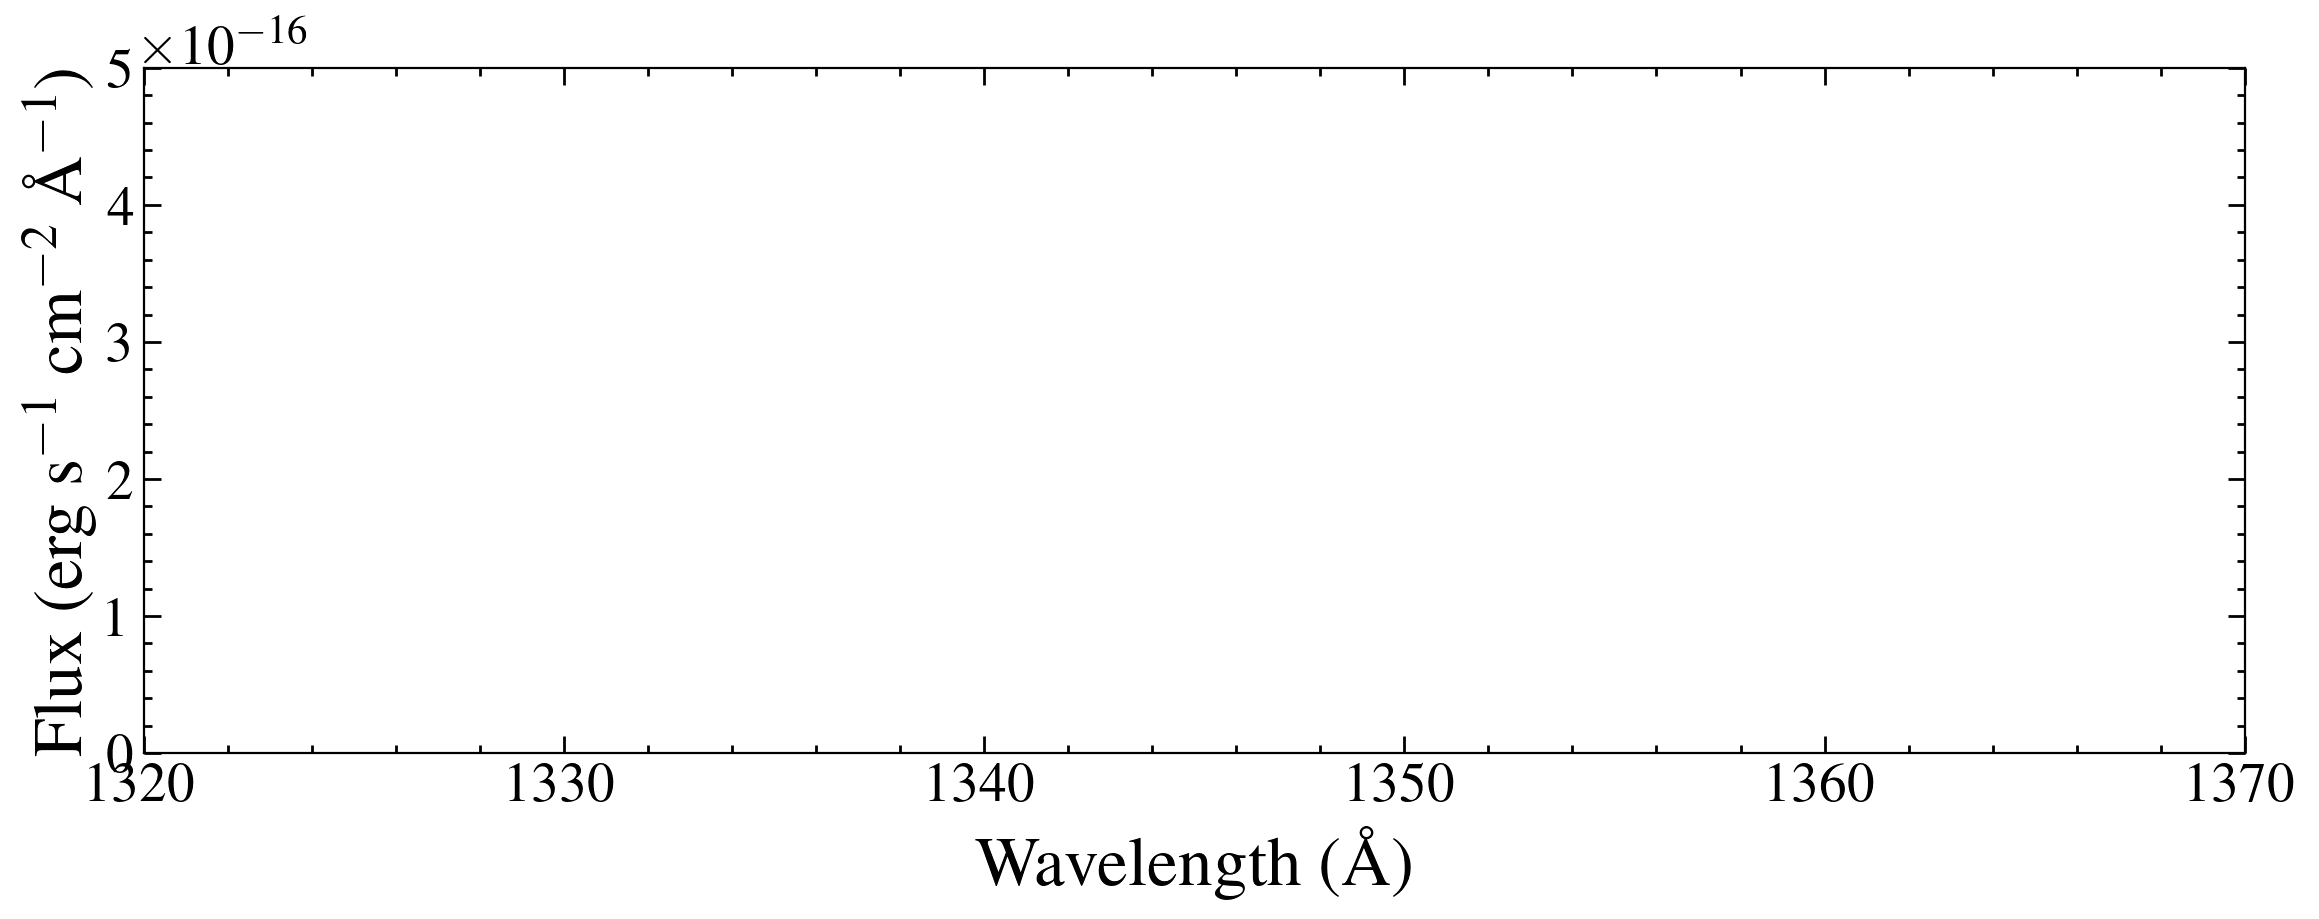

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits


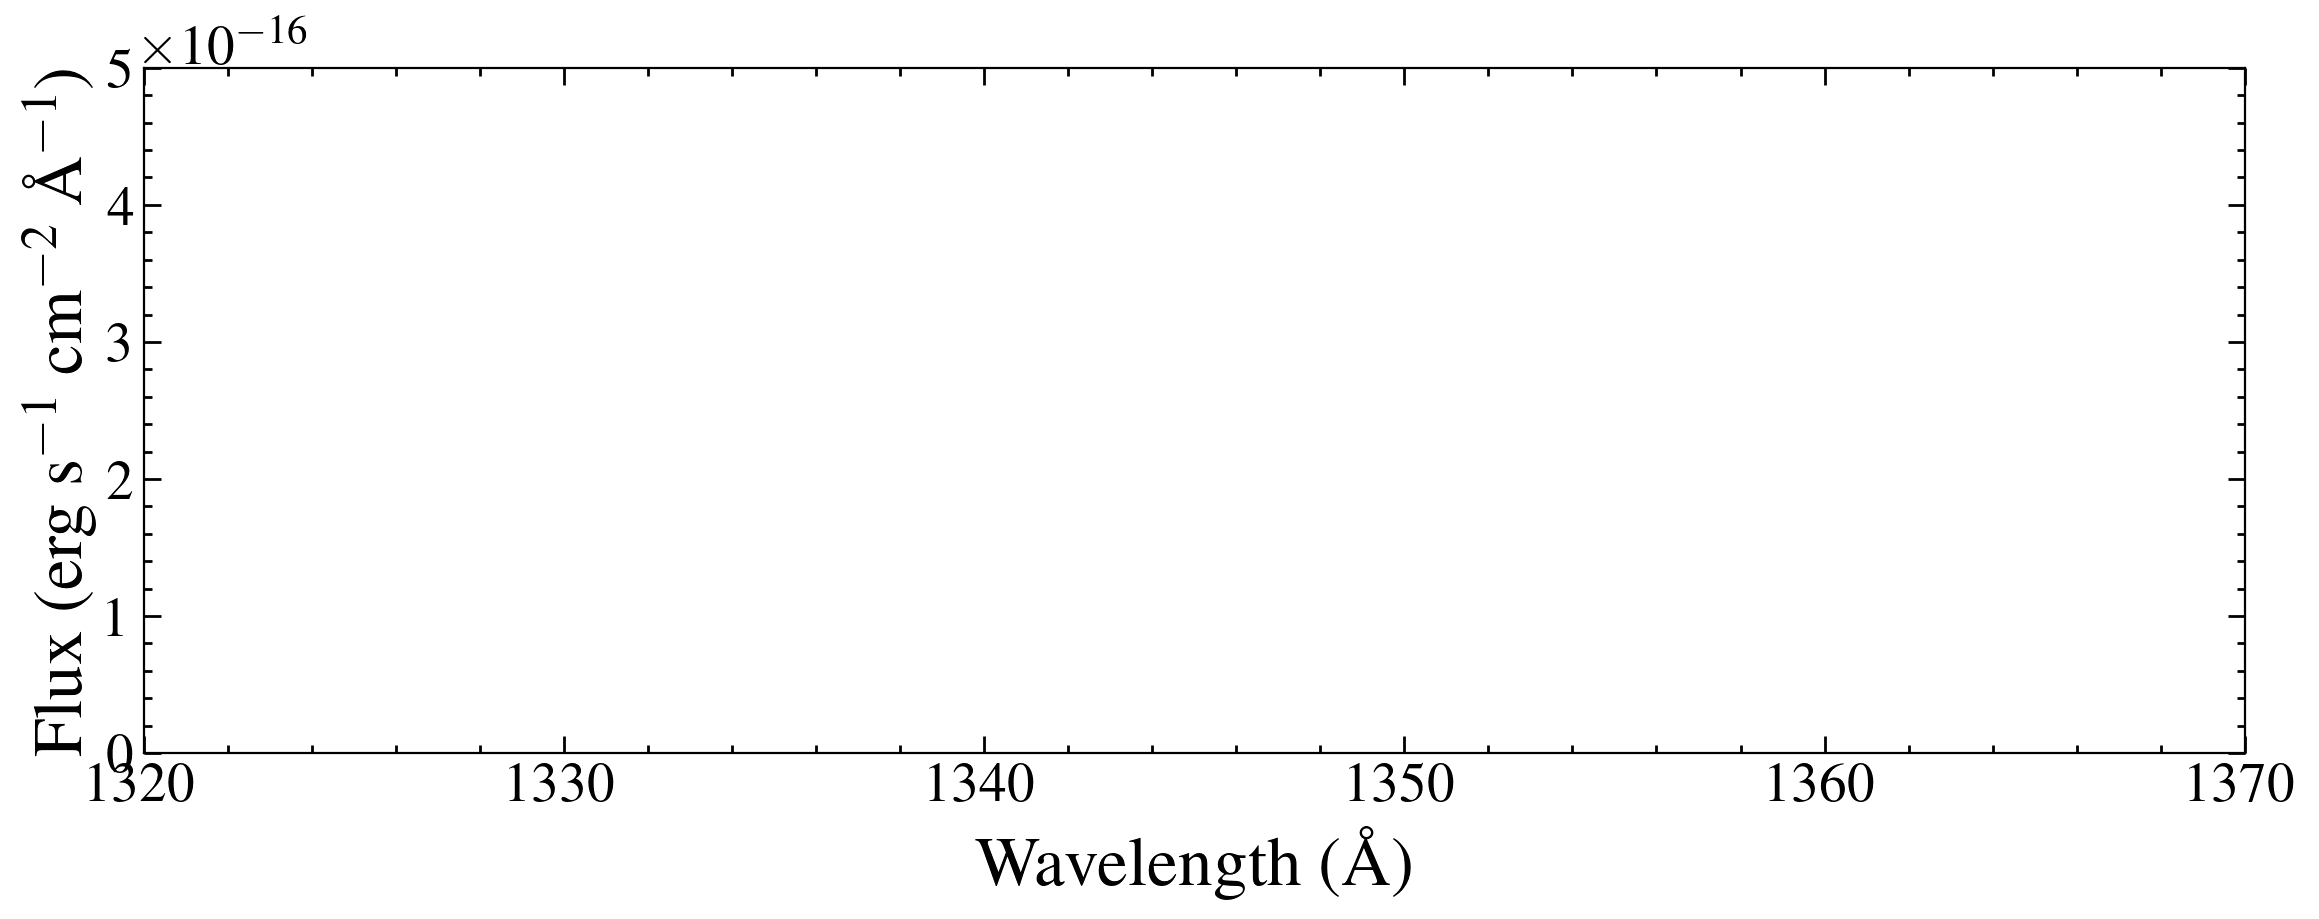

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


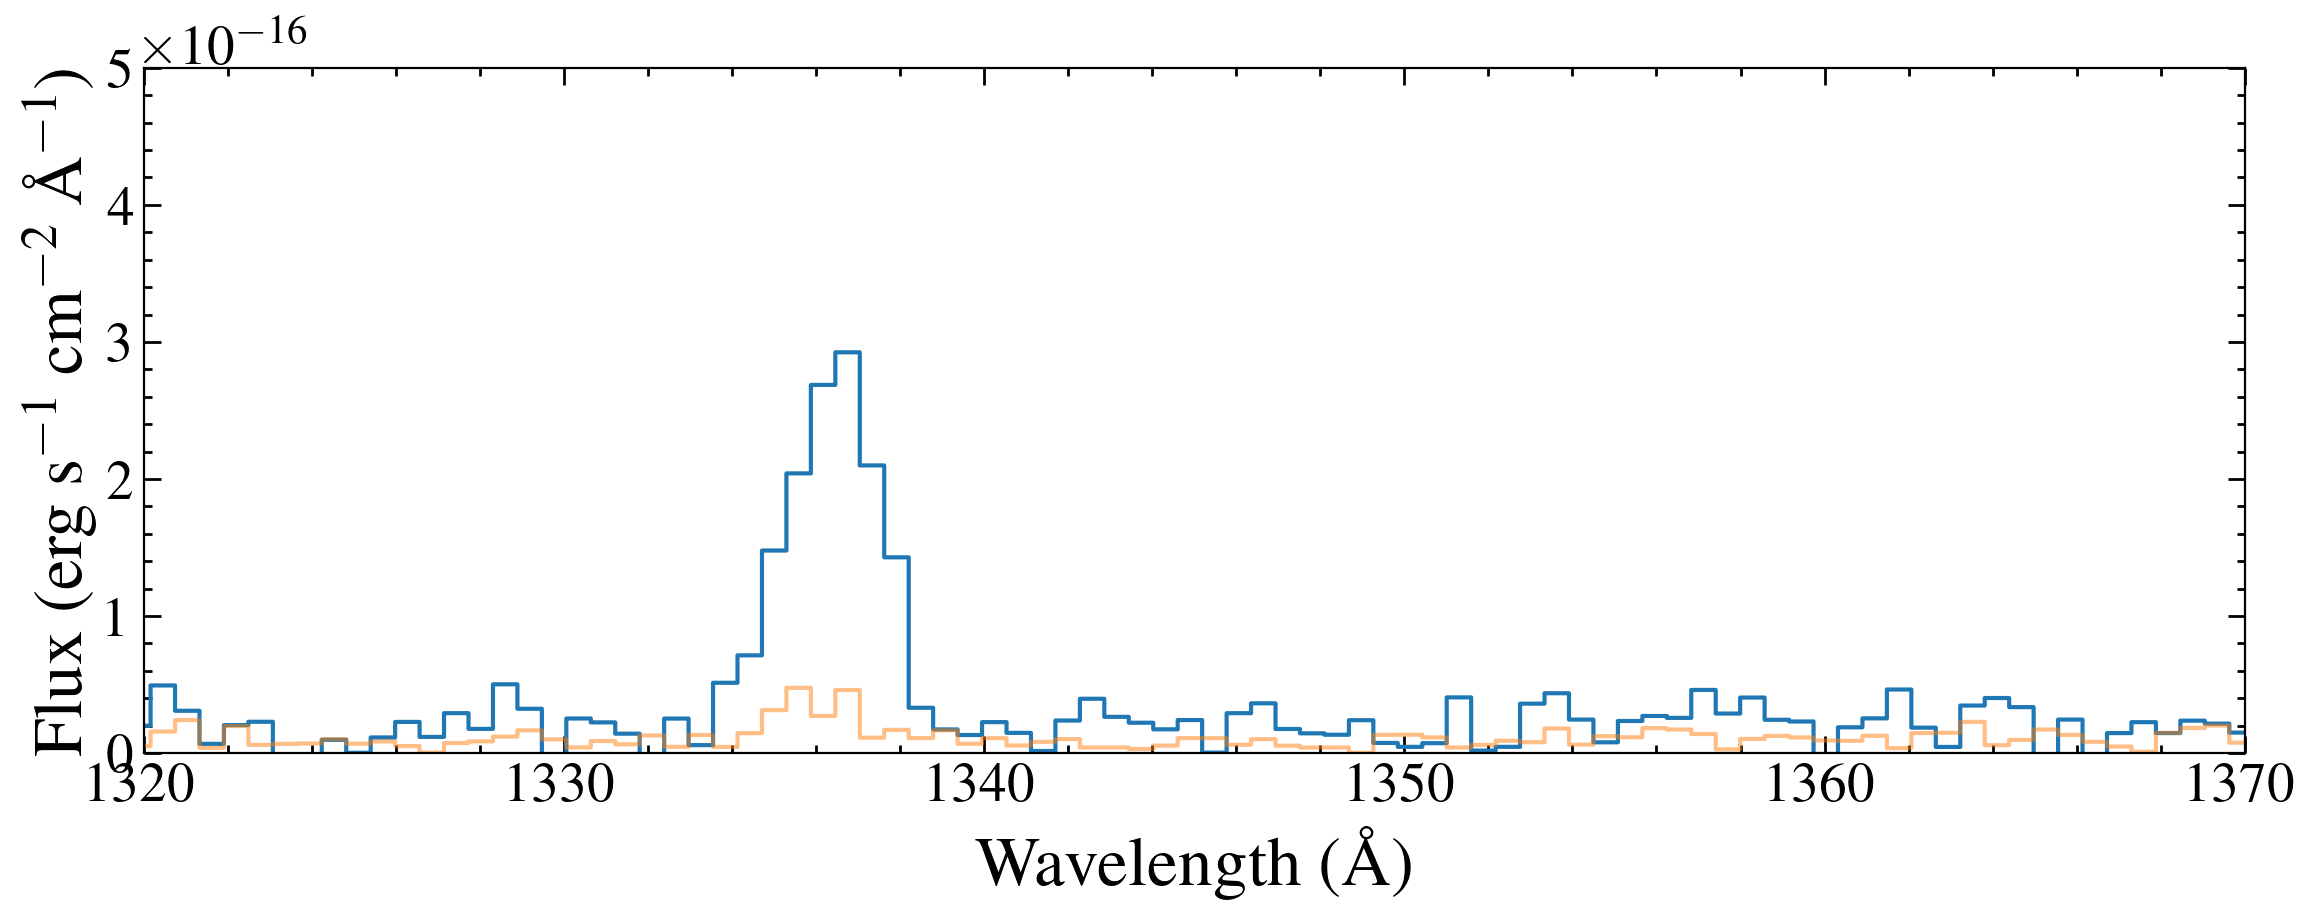

In [147]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    
    plt.xlim(1320, 1370)
    plt.ylim(0, 0.5e-15)
    plt.tight_layout()

    
    plt.show()
    

Need to look at extinction

In [148]:
from dust_extinction.parameter_averages import F99


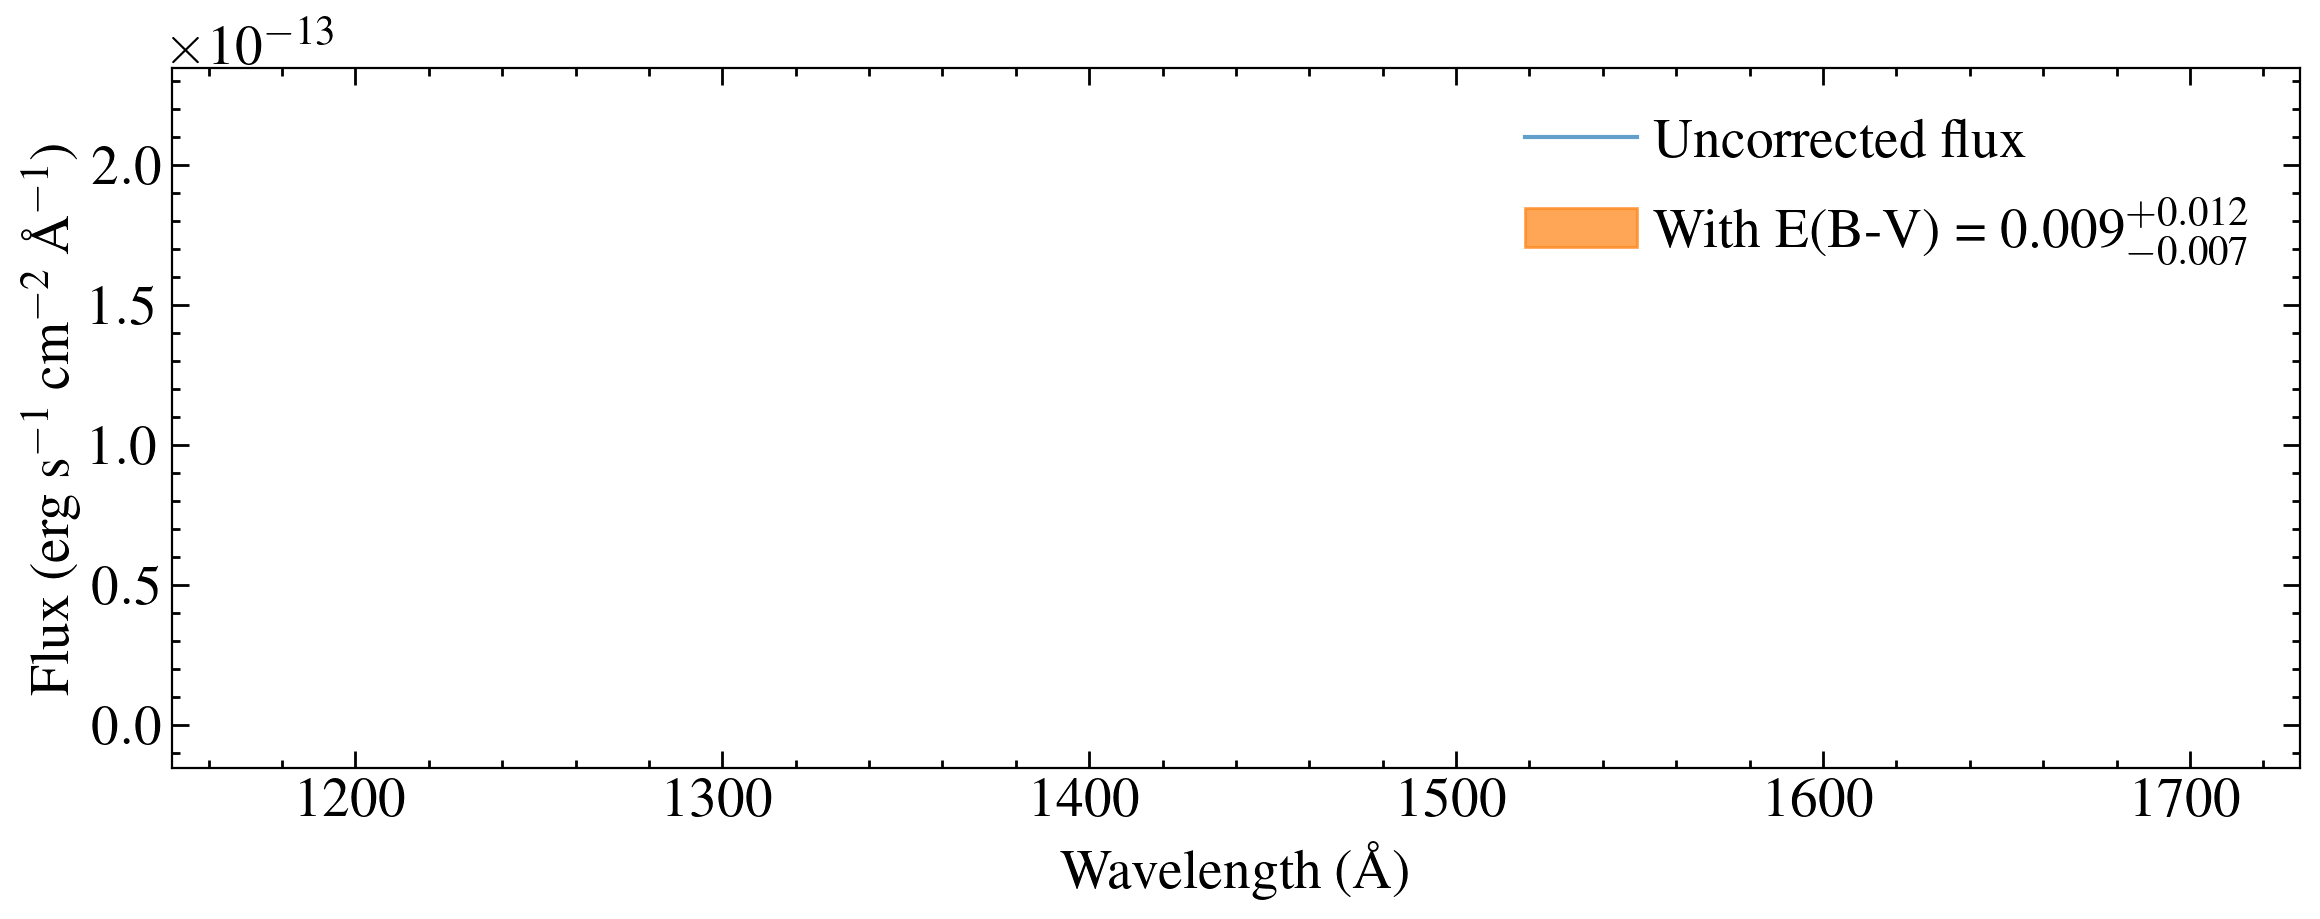

In [149]:



ebv = 0.009 #from https://arxiv.org/pdf/1506.02471.pdf, +0.012 -0.007 not too help
ebv_up = 0.012
ebv_lo = 0.007
ext = F99(Rv=3.1)

fig, ax = plt.subplots(figsize=(12, 5))

data = fits.getdata(hlsp[1], 1)
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) & (w <1212) | (w > 1220) & (w < 1635) | (w > 1640)
w, f, e = w[mask], f[mask], e[mask]

# plt.plot(w, f)
red = ext.extinguish(w*u.AA, Ebv=ebv)
red_up = ext.extinguish(w*u.AA, Ebv=ebv+ebv_up)
red_lo = ext.extinguish(w*u.AA, Ebv=ebv-ebv_lo)

# plt.plot(w, red)

ax.plot(w, f, alpha =0.7, label='Uncorrected flux')
# ax.step(w, f,where='mid', alpha =0.7, label='Uncorrected flux')
# plt.plot(w, f*red_up, alpha =0.7)
# plt.plot(w, f*red_lo, alpha =0.7)
ax.fill_between(w, f/red_up,f/red_lo, color='C1', alpha=0.7, label = r'With E(B-V) = {}$^{{+{}}}_{{-{}}}$'.format(ebv, ebv_up, ebv_lo))

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')
ax.legend()
ax.set_xlim(1150, 1730)
fig.tight_layout()
# plt.yscale('log')

# plt.show()
# plt.plot(w, f/(f/red))


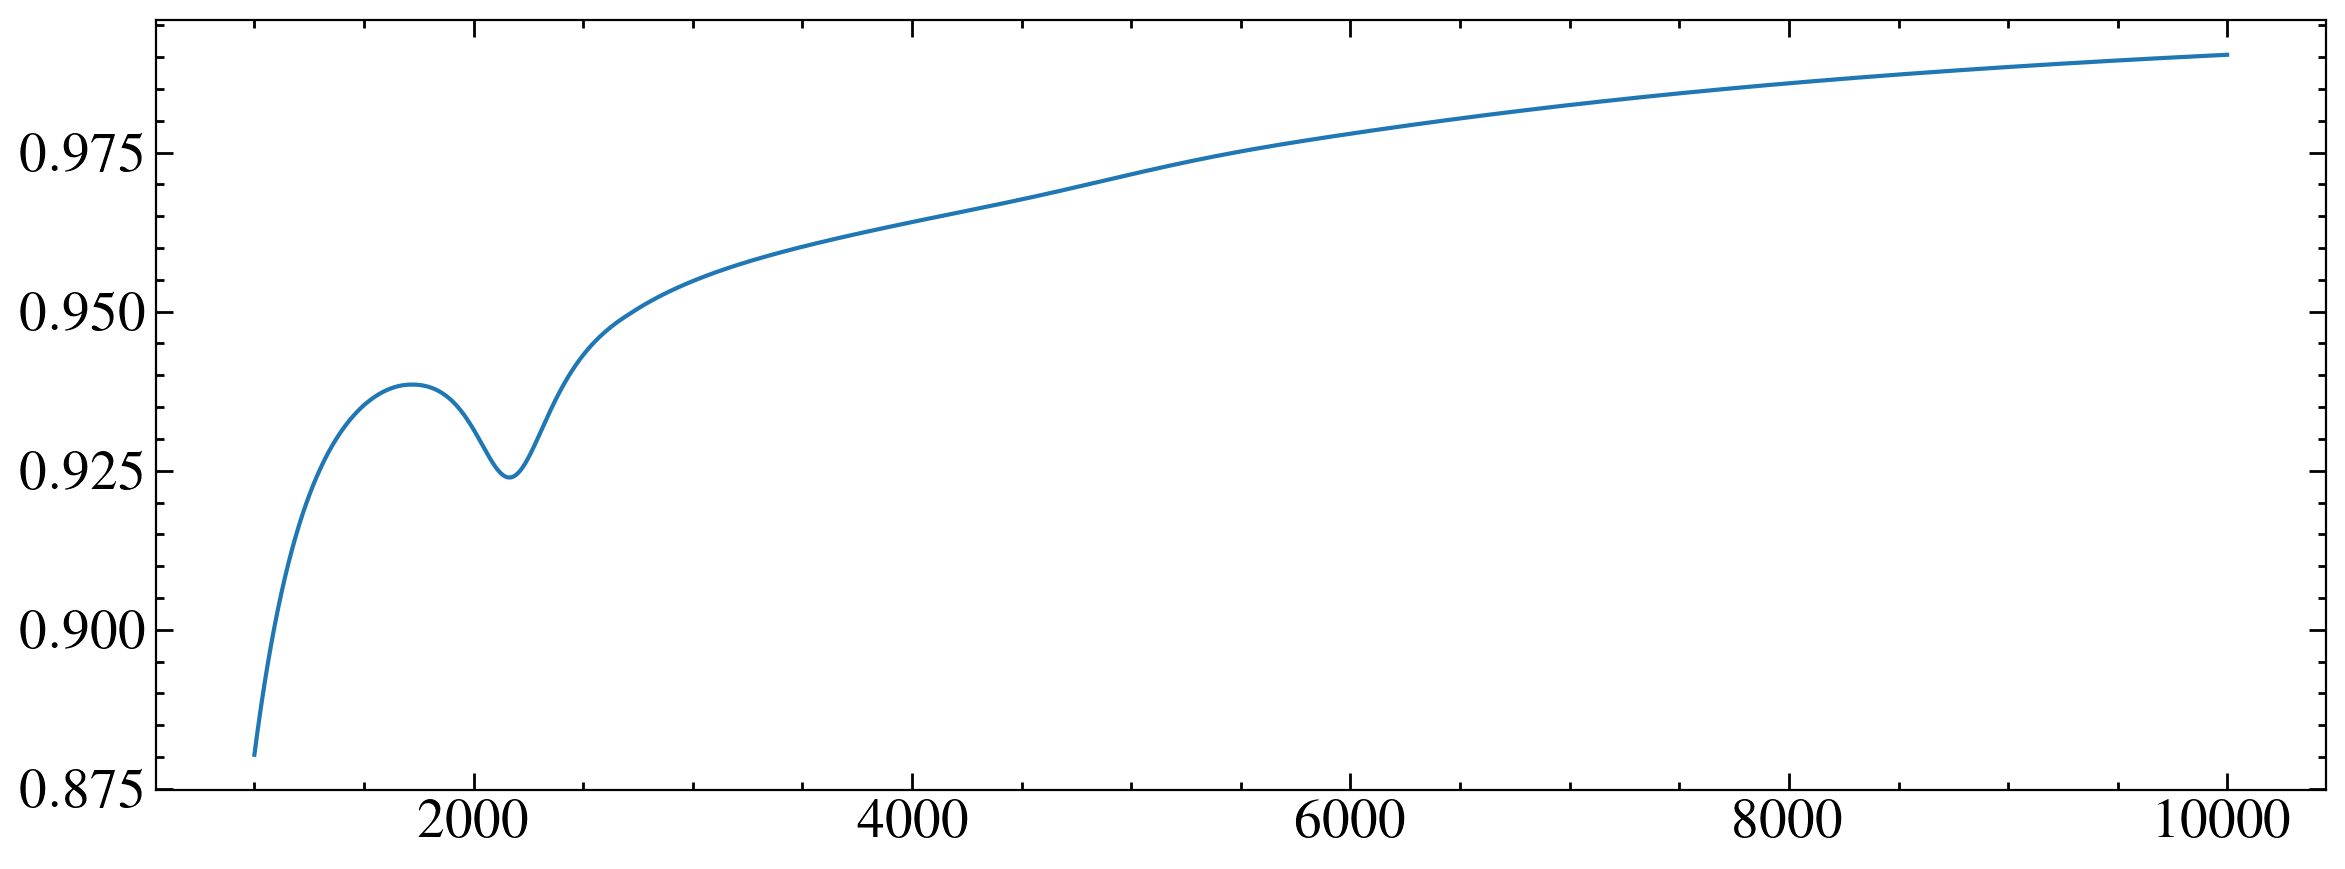

In [150]:
w_all = np.arange(1000, 10000)*u.AA
red = ext.extinguish(w_all, Ebv=ebv) 

plt.plot(w_all, red)

Ok so we can probably ignore the reddening? Phoenix model next. DEM and X-ray are in hand, need to add x-ray error calculation to prepare-xmm if I can.

In [151]:
import importlib
import prepare_phoenix_svo as pp
importlib.reload(pp)

<module 'prepare_phoenix_svo' from '/home/david/work/meats/SEDs/prepare_phoenix_svo.py'>

In [152]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 1.353

teff = 6459
teff_e = 140
radius = 1.458
distance = 272.01
save_path = 'models/'
star = 'wasp-121'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = 4.242
# print(np.log10(g.value))
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2

In [153]:
pdata = Table.read('models/wasp-121_phoenix_interpolated.ecsv')
pw, pf, pe = pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR']


/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2010_x1d.fits


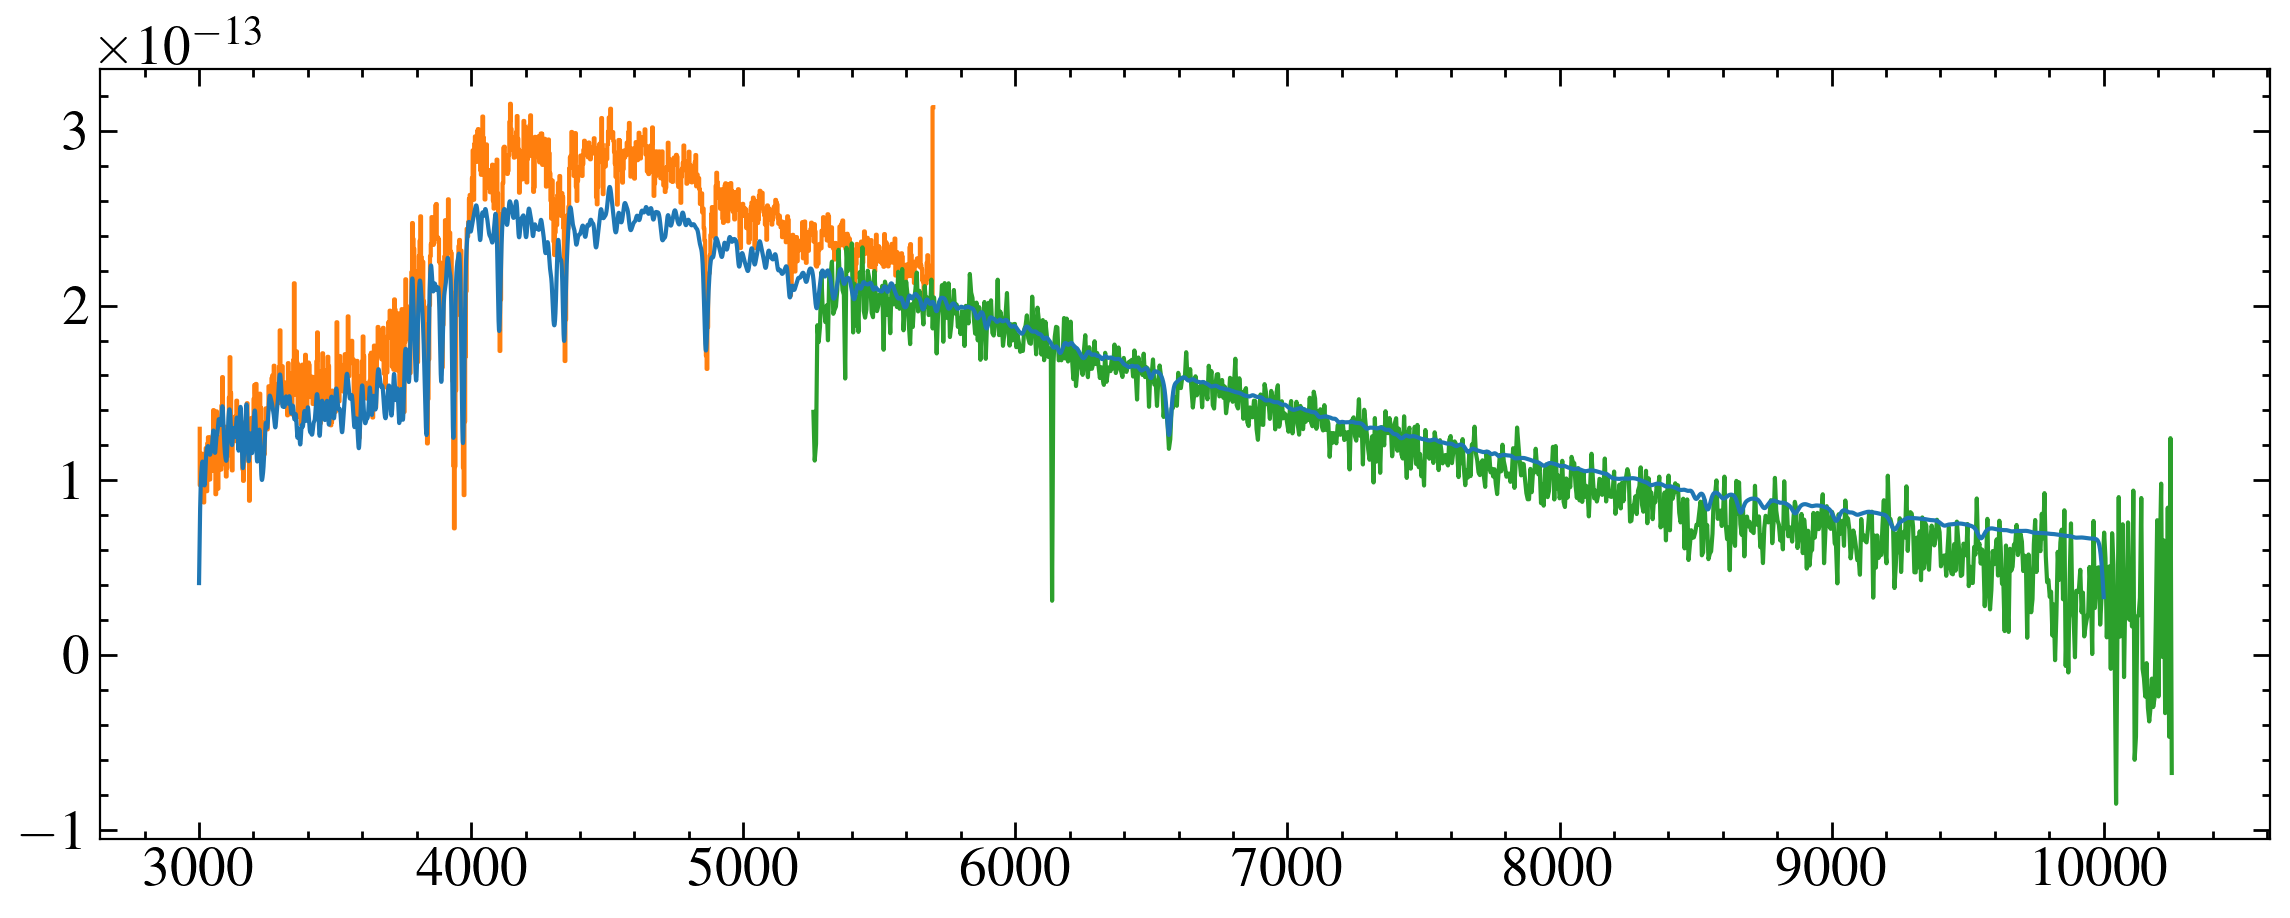

In [154]:

# plt.plot(pw, pf*normfac)
pmask = (pw > 3000) & (pw < 1e4)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi, pfi)
# plt.yscale('log')
# plt.xscale('log')
# plt.step(w_opt, f_opt, label='G430L')
# plt.step(w_nuv, f_nuv, label='G230L')
# plt.step(w_lya, f_lya, label='G140M')
# plt.step(w, f, where='mid')
plt.step(w_opt, f_opt, label='G430L', zorder=-1)
# plt.ylim(1e-18)

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
        print(x)
        data = fits.getdata(x, 1)[0]
        plt.plot(data['WAVELENGTH'], data['FLUX'], zorder=-1)
        break
    

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2010_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2030_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2050_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2070_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2090_x1d.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2020_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2040_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2060_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2080_sx1.fits
/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20a0_sx1.fits


(0.0, 3e-13)

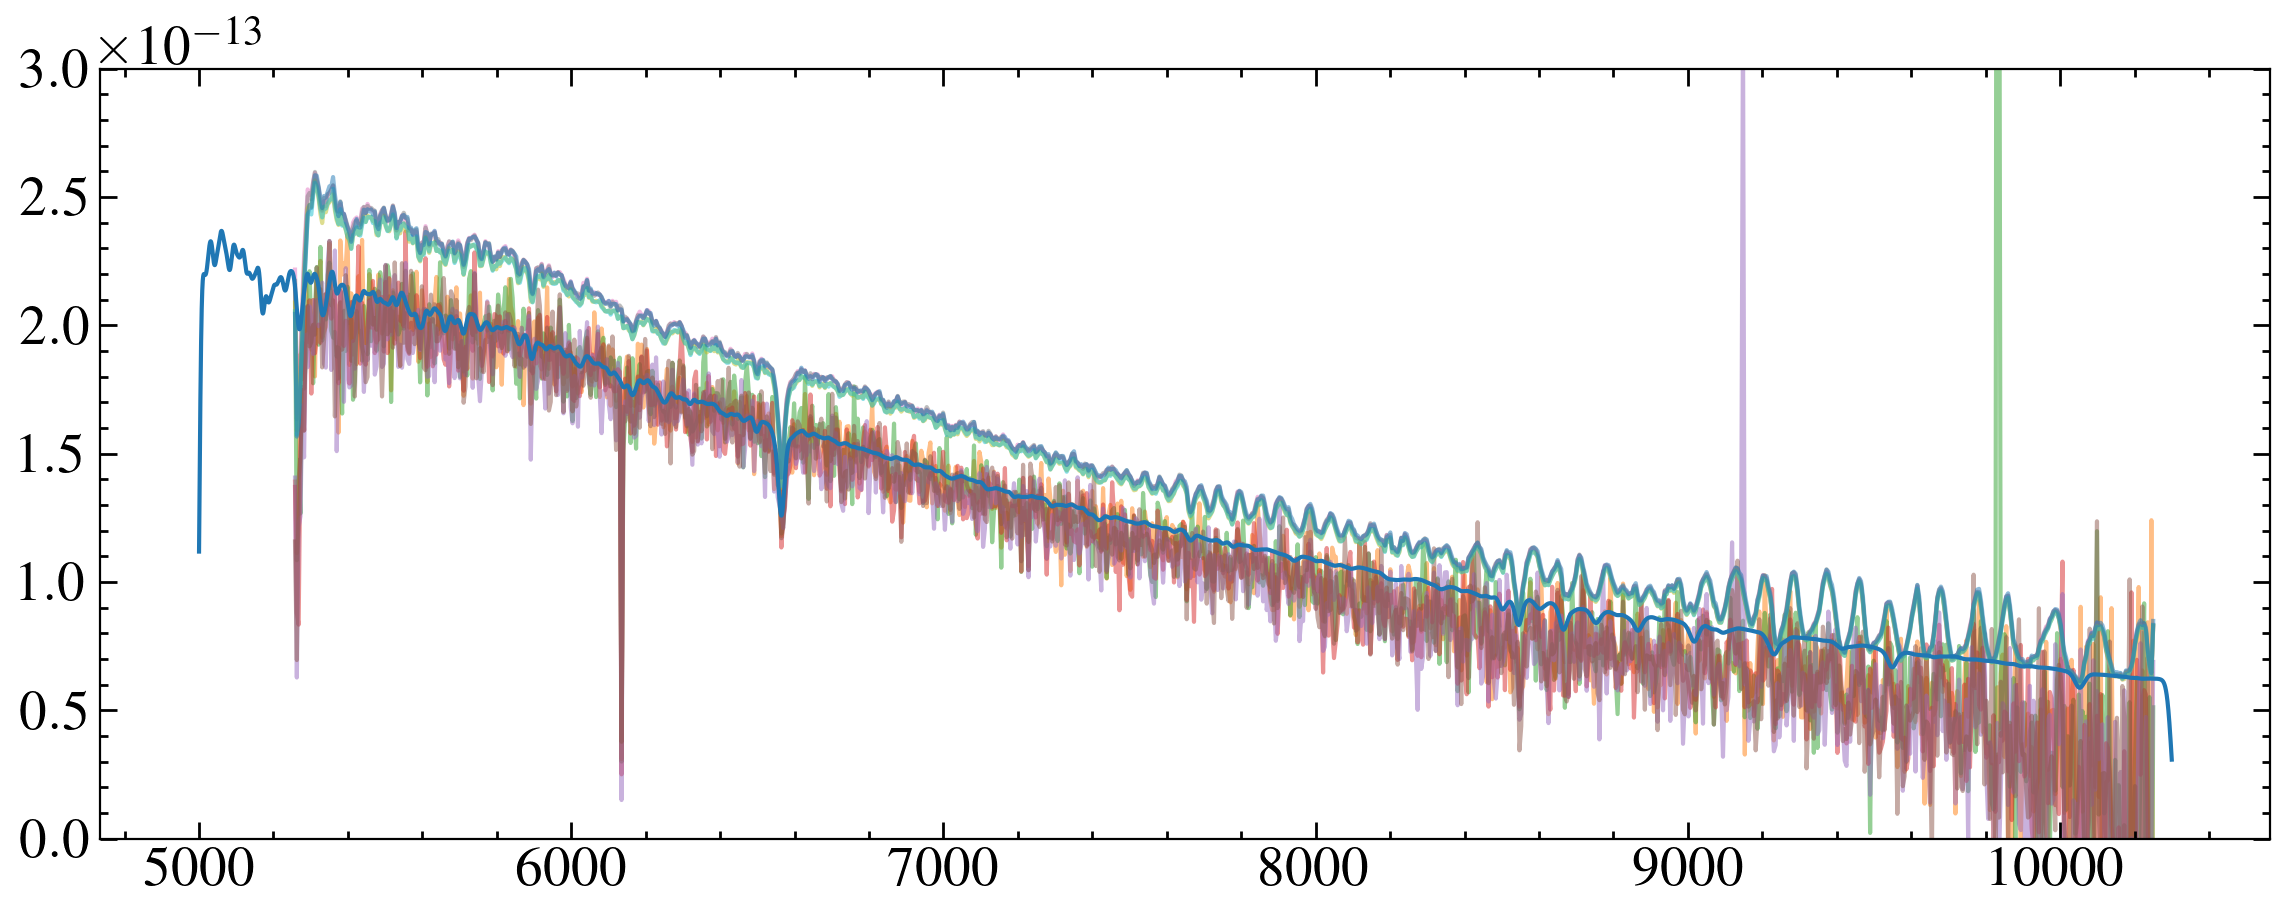

In [155]:
pmask = (pw > 5000) & (pw < 10300)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi, pfi)

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
        print(x)
        data = fits.getdata(x, 1)[0]
        plt.plot(data['WAVELENGTH'], data['FLUX'], zorder=-1, alpha=0.5)
        
plt.ylim(0, 3e-13)


In [156]:
# g750ls = []
# for x in x1ds:
#     if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L':
#         g750ls.append(x)

# fig, ax = plt.subplots(figsize=(12, 15))

# for i, x in enumerate(g750ls):
#     hdr = fits.getheader(x, 0) 
#     data = fits.getdata(x, 1)[0]
#     w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     norm = np.median(f)
#     plt.plot(w, (f/norm)+i)
#     root, time = hdr['ROOTNAME'], hdr['TEXPTIME']
#     plt.annotate('{} ({:.0f}\,s)'.format(root, time), (10300, i), xycoords='data', va='bottom')
    
# ax.set_xlim(5100, 12000)


In [157]:
import stistools

In [158]:
os.environ['oref'] = path

In [159]:
g750ls = []
for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G750L' and fits.getheader(x, 0)['TEXPTIME'] > 10:
        g750ls.append(x)
g750ls

['/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2020_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2040_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2060_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma2080_sx1.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9ma20a0_sx1.fits']

In [160]:


# for i, x in enumerate(g750ls):
#     hdr = fits.getheader(x, 0)
#     root = hdr['ROOTNAME']
#     flat = hdr['FRNGFLAT']
#     print(hdr['ROOTNAME'], hdr['FRNGFLAT'])
#     flatpath = '{}{}'.format(path, flat.lower())
#     scipath = '{}{}'.format(path, root)
#     stistools.defringe.normspflat('{}_raw.fits'.format(flatpath),
#                               '{}_nsp.fits'.format(flatpath), do_cal=True,
#                               wavecal='{}_wav.fits'.format(scipath))
#     with fits.open('{}_nsp.fits'.format(flatpath), mode='update') as hdulist:
#         hdulist[1].data[:,:250] = 1
#     mode = fits.getheader('{}_raw.fits'.format(scipath),0)['OPT_ELEM']
#     if mode == "G750L":
#         prod_type = "crj"
#     elif mode == "G750M":
#         prod_type = "sx2"
        
#     if os.path.exists('{}_frr.fits'.format(flatpath)):
#         os.remove('{}_frr.fits'.format(flatpath))

#     stistools.defringe.mkfringeflat('{}_{}.fits'.format(scipath, prod_type), '{}_nsp.fits'.format(flatpath),
#                                     '{}_frr.fits'.format(flatpath), beg_shift=-0.5, end_shift=2, shift_step=0.1,
#                                     beg_scale=0.8, end_scale=1.7, scale_step=0.04)
    
#     stistools.defringe.defringe('{}_{}.fits'.format(scipath, prod_type), '{}_frr.fits'.format(flatpath), overwrite=True)
    
#     outpath = '{}defringed/'.format(path)
#     outname = '{}{}_defringed_x1d.fits'.format(outpath, root)
         
#     if os.path.exists(outname):
#         os.remove(outname)
    
#     drj = '{}_drj.fits'.format(scipath)
#     trl = '{}{}.trl'.format(outpath, root)
#     stistools.x1d.x1d(drj, output = outname, trailer=trl)
    
#     fig, ax = plt.subplots()
#     olddata = fits.getdata(x, 1)[0]
#     w0, f0 , e0 = olddata['WAVELENGTH'], olddata['FLUX'], olddata['ERROR']
    
#     newdata = fits.getdata(outname, 1)[0]
#     w1, f1 , e1 = newdata['WAVELENGTH'], newdata['FLUX'], newdata['ERROR']
    
#     plt.plot(w0, f0)
#     plt.plot(w0, e0)
#     plt.plot(w1, f1)
#     plt.plot(w1, e1)
#     plt.show()
    
    


/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


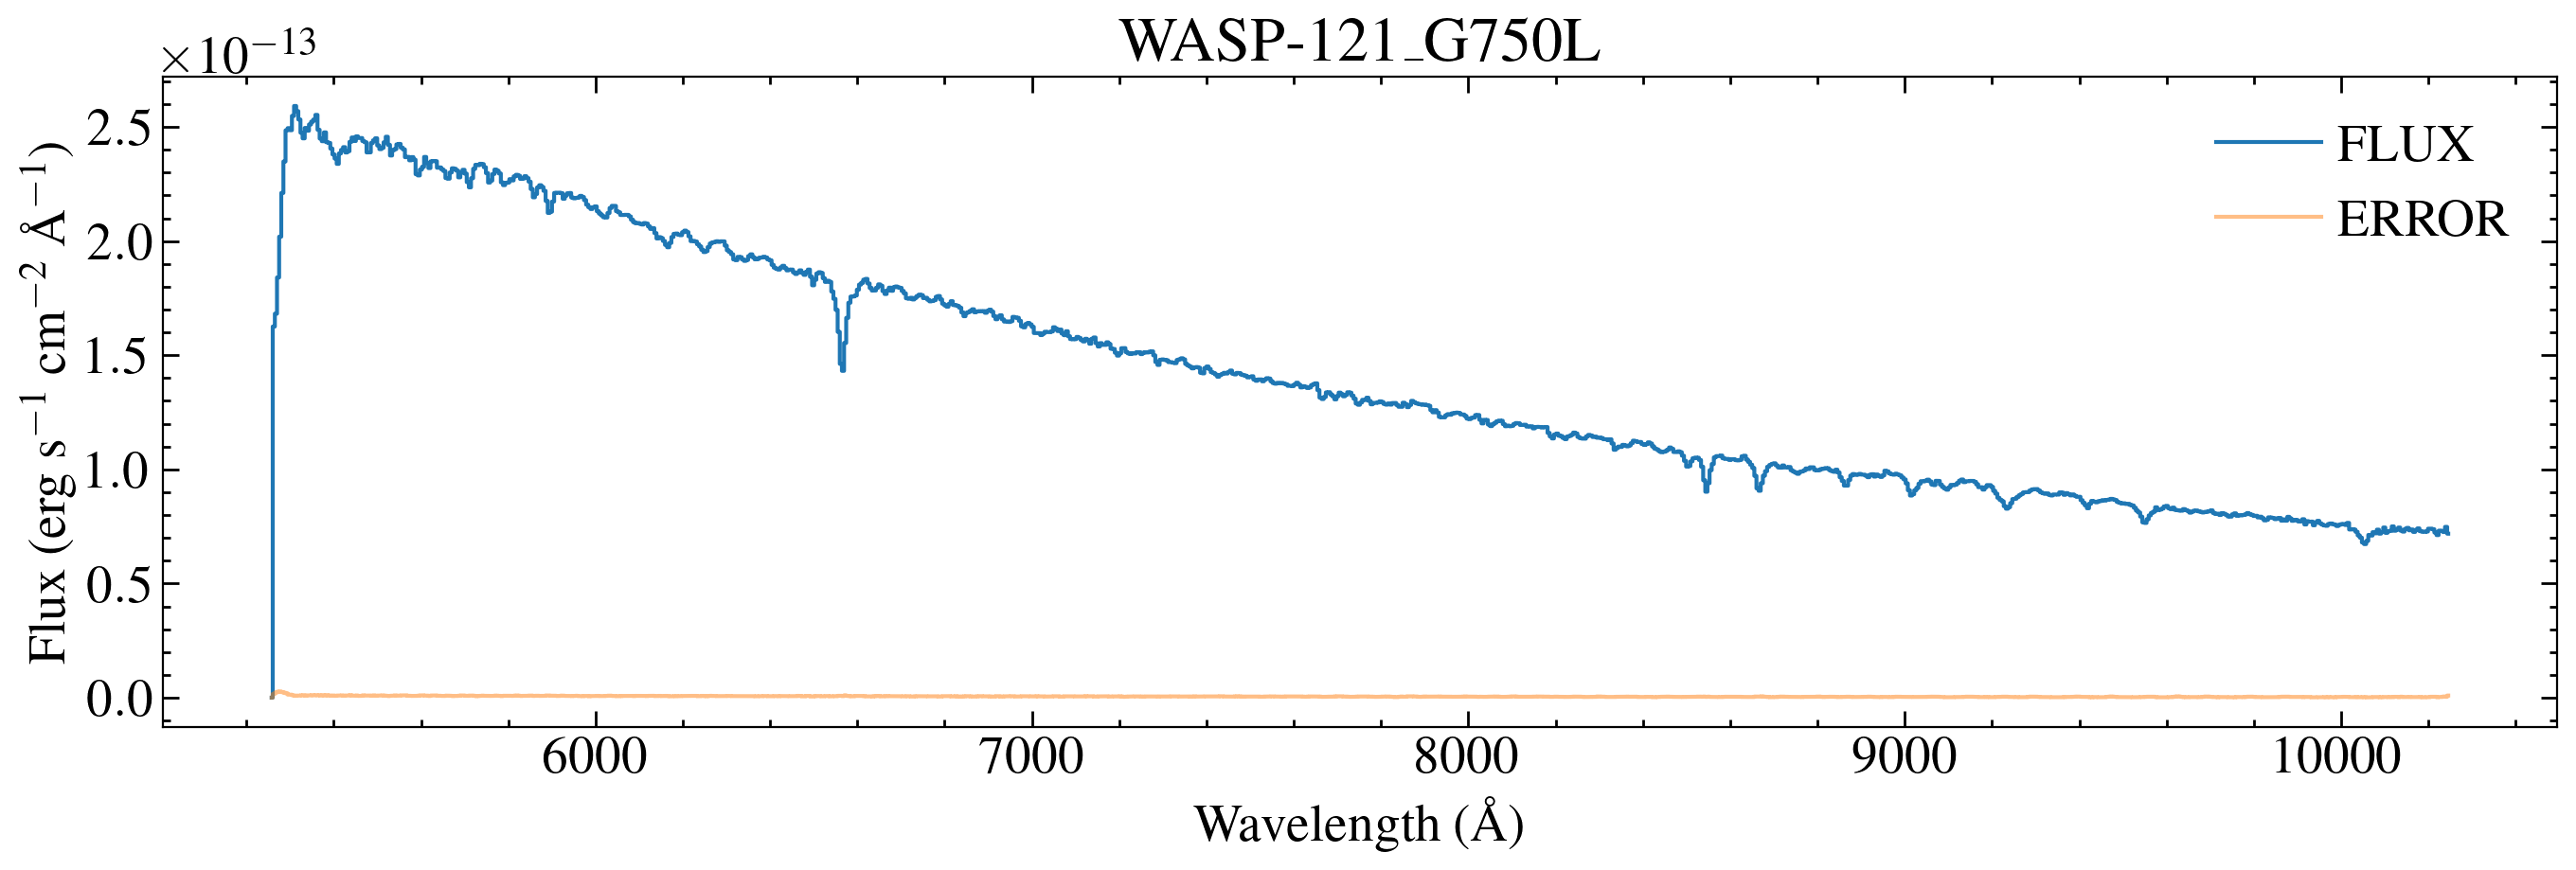

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits


In [161]:
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/defringed/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

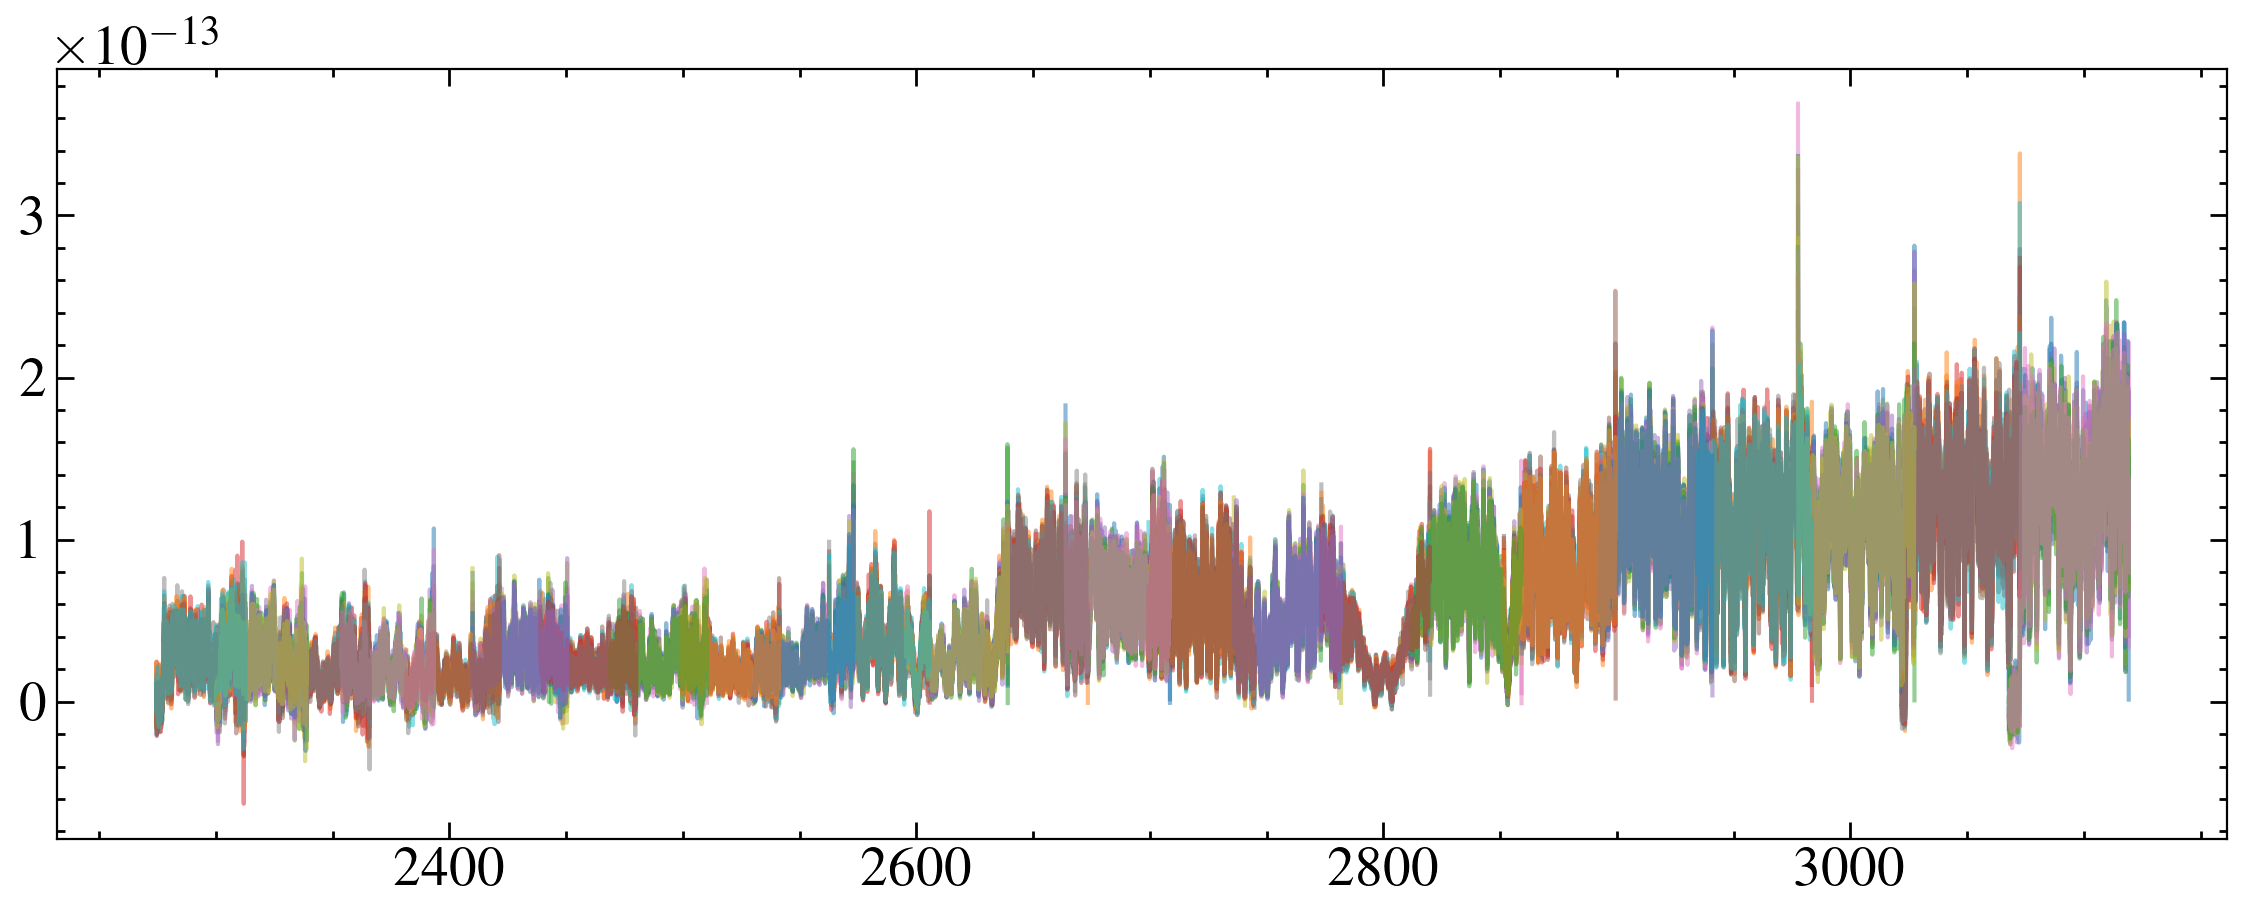

In [162]:
e230m = []

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'E230M':
        e230m.append(x)
        dt = fits.getdata(x, 1)
        for data in dt:
            w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
            plt.plot(w, f , alpha =0.5)
   
            

/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


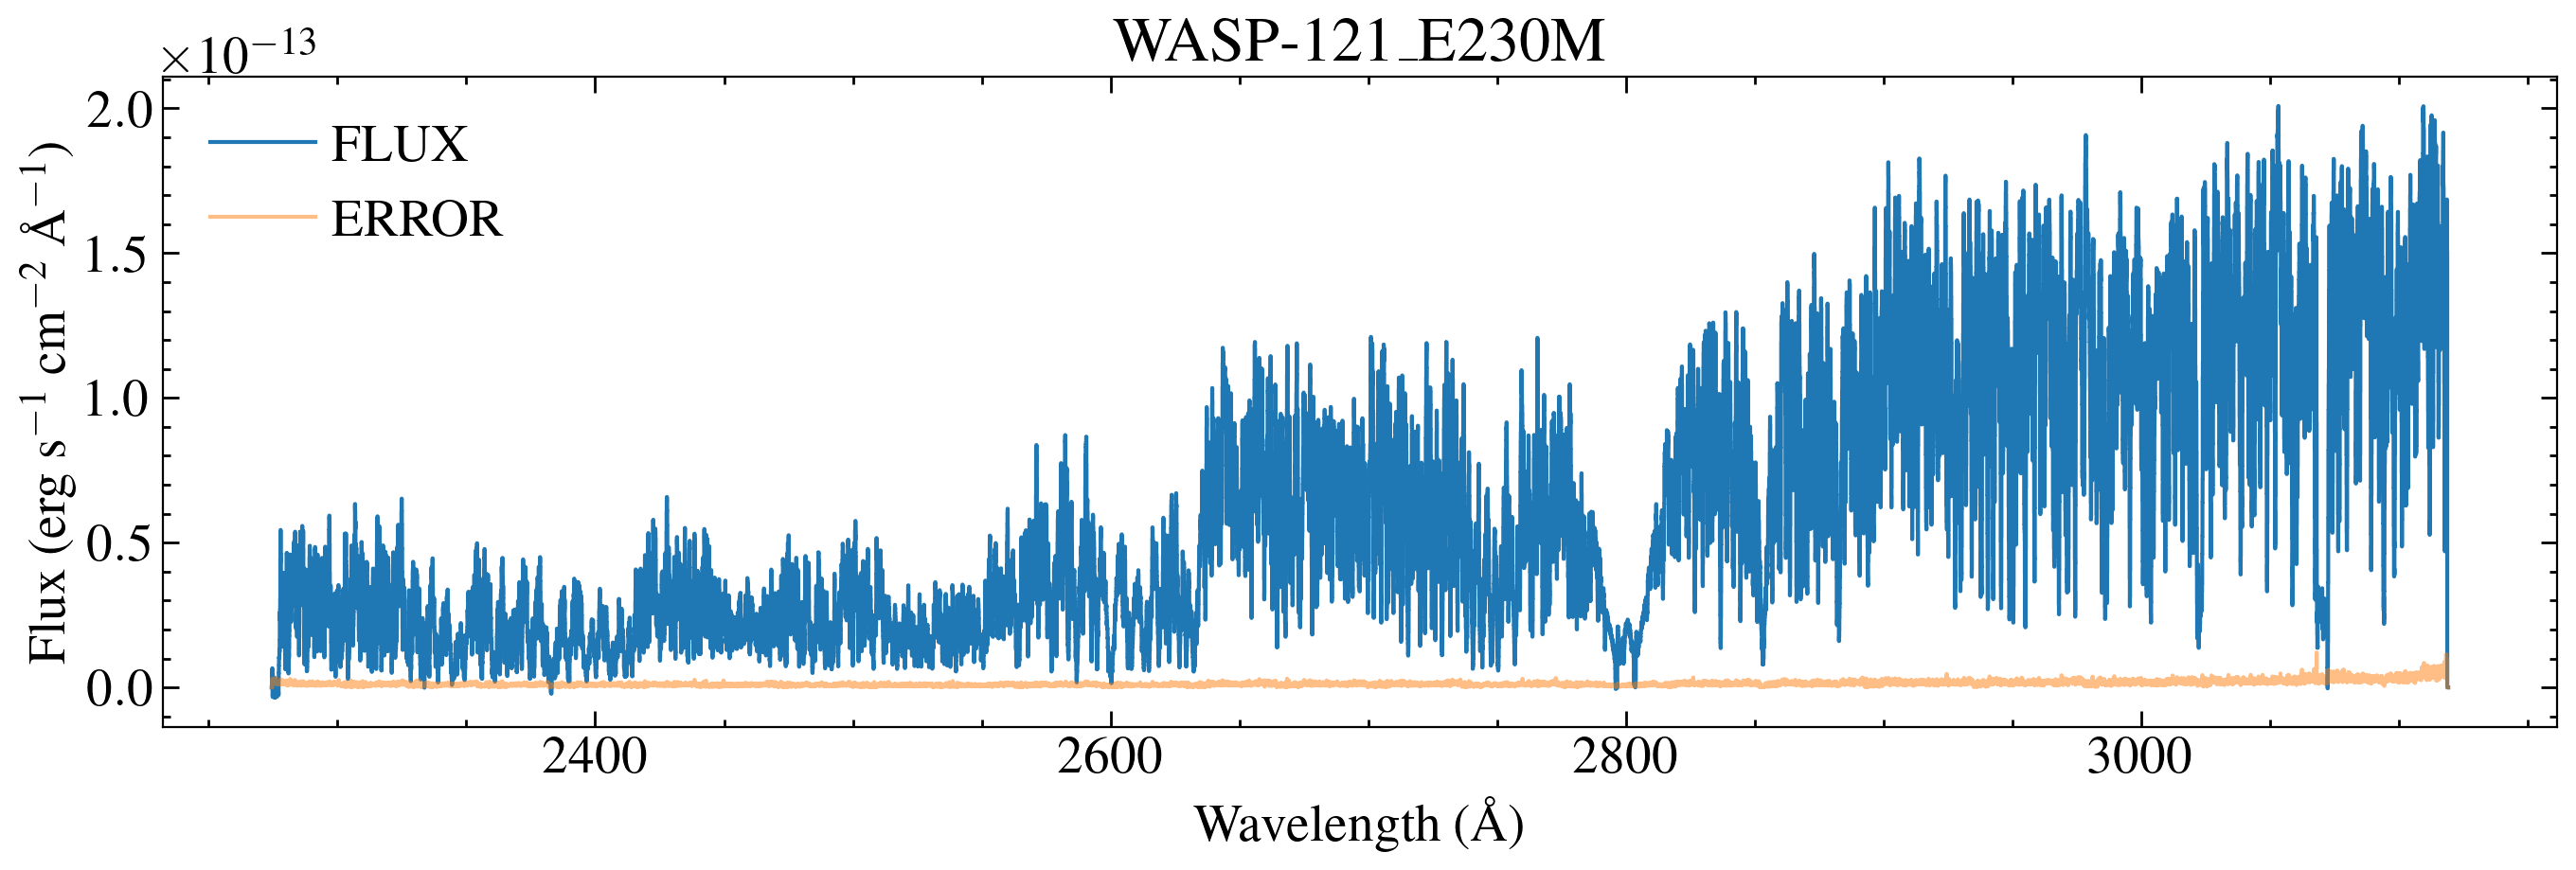

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits


In [163]:
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/nuv/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

In [164]:
ls draft_hlsp/wasp-121/

hlsp_muscles_hst_stis_wasp-121_e230m_v1_component-spec.fits
hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits
hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits
hlsp_muscles_hst_stis_wasp-121_g750l_v1_component-spec.fits


/tmp/ipykernel_168871/3171539701.py:21: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


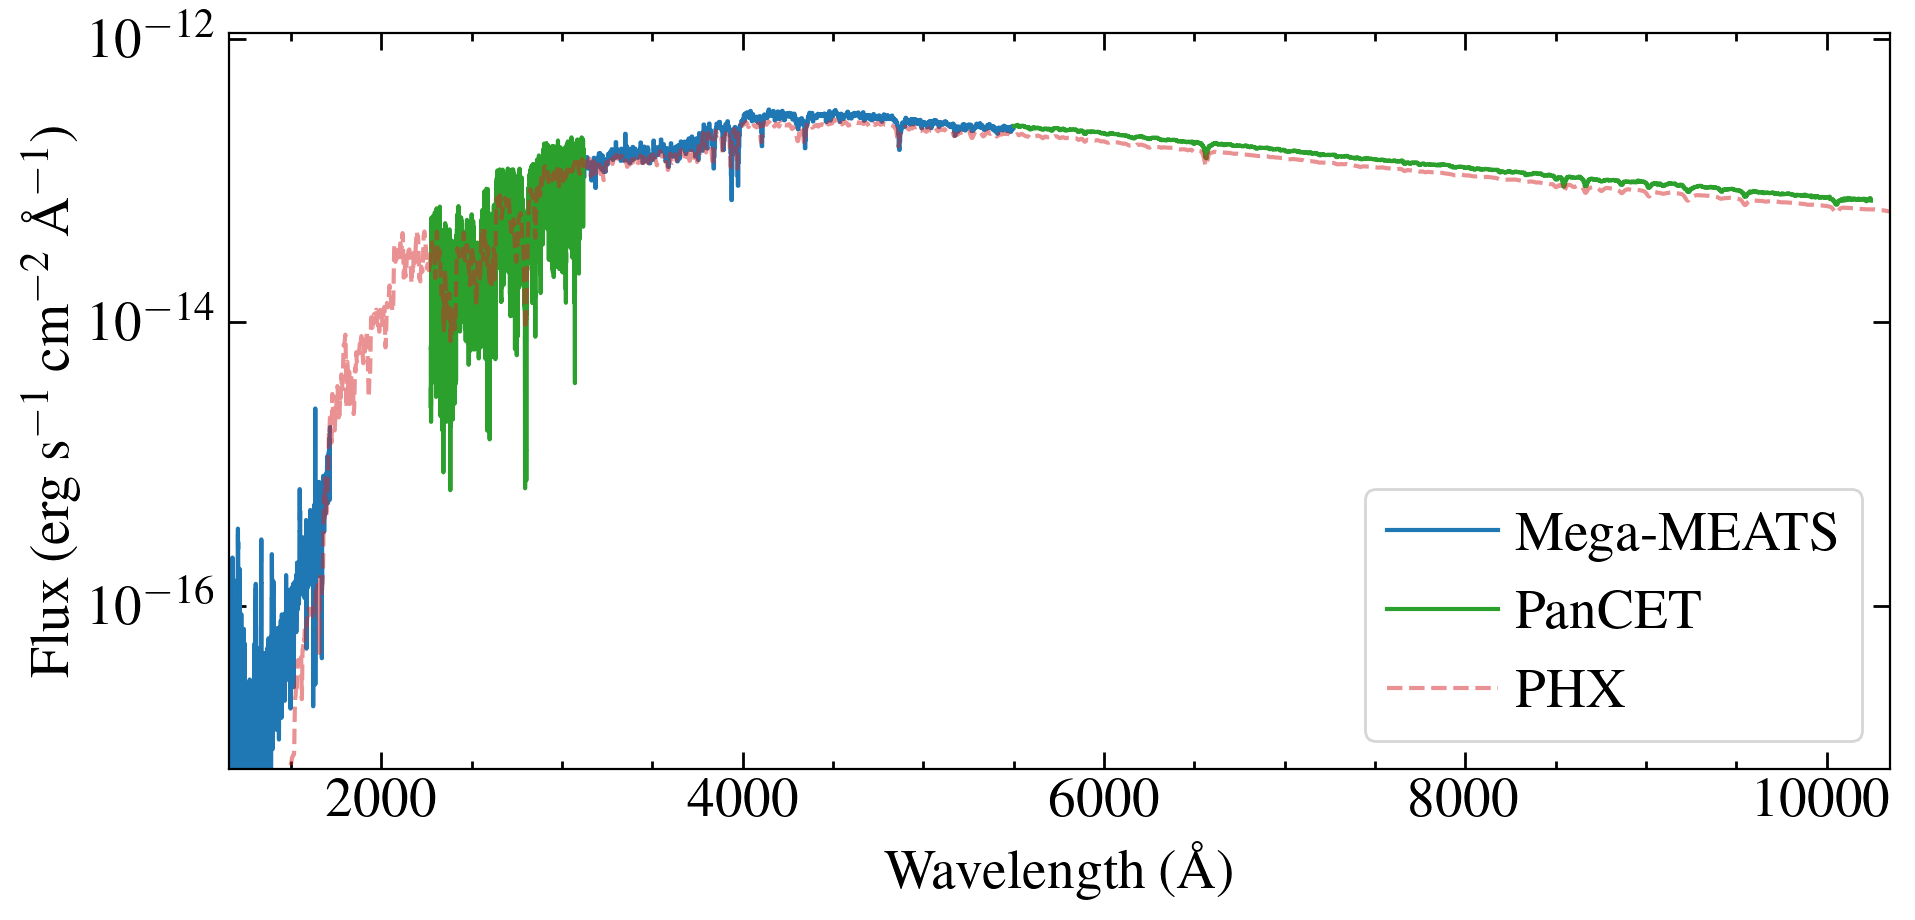

In [172]:
hlsp_x1ds = glob.glob('draft_hlsp/wasp-121/*stis*')

fig, ax = plt.subplots(figsize=(10, 5))

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw < 10500)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)
plt.plot(pwi[pwi < 10400], pfi[pwi < 10400], c='C3', label = 'PHX', alpha=0.5, ls='--')

ax.set_yscale('log')

ax.set_ylim(7e-18)
ax.set_xlim(1160, 10350)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
ax.set_xlabel('Wavelength (\AA)', size=20)
fig.tight_layout()

fig.savefig('plots/wasp-121_stis.pdf')

/tmp/ipykernel_168871/880186105.py:21: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


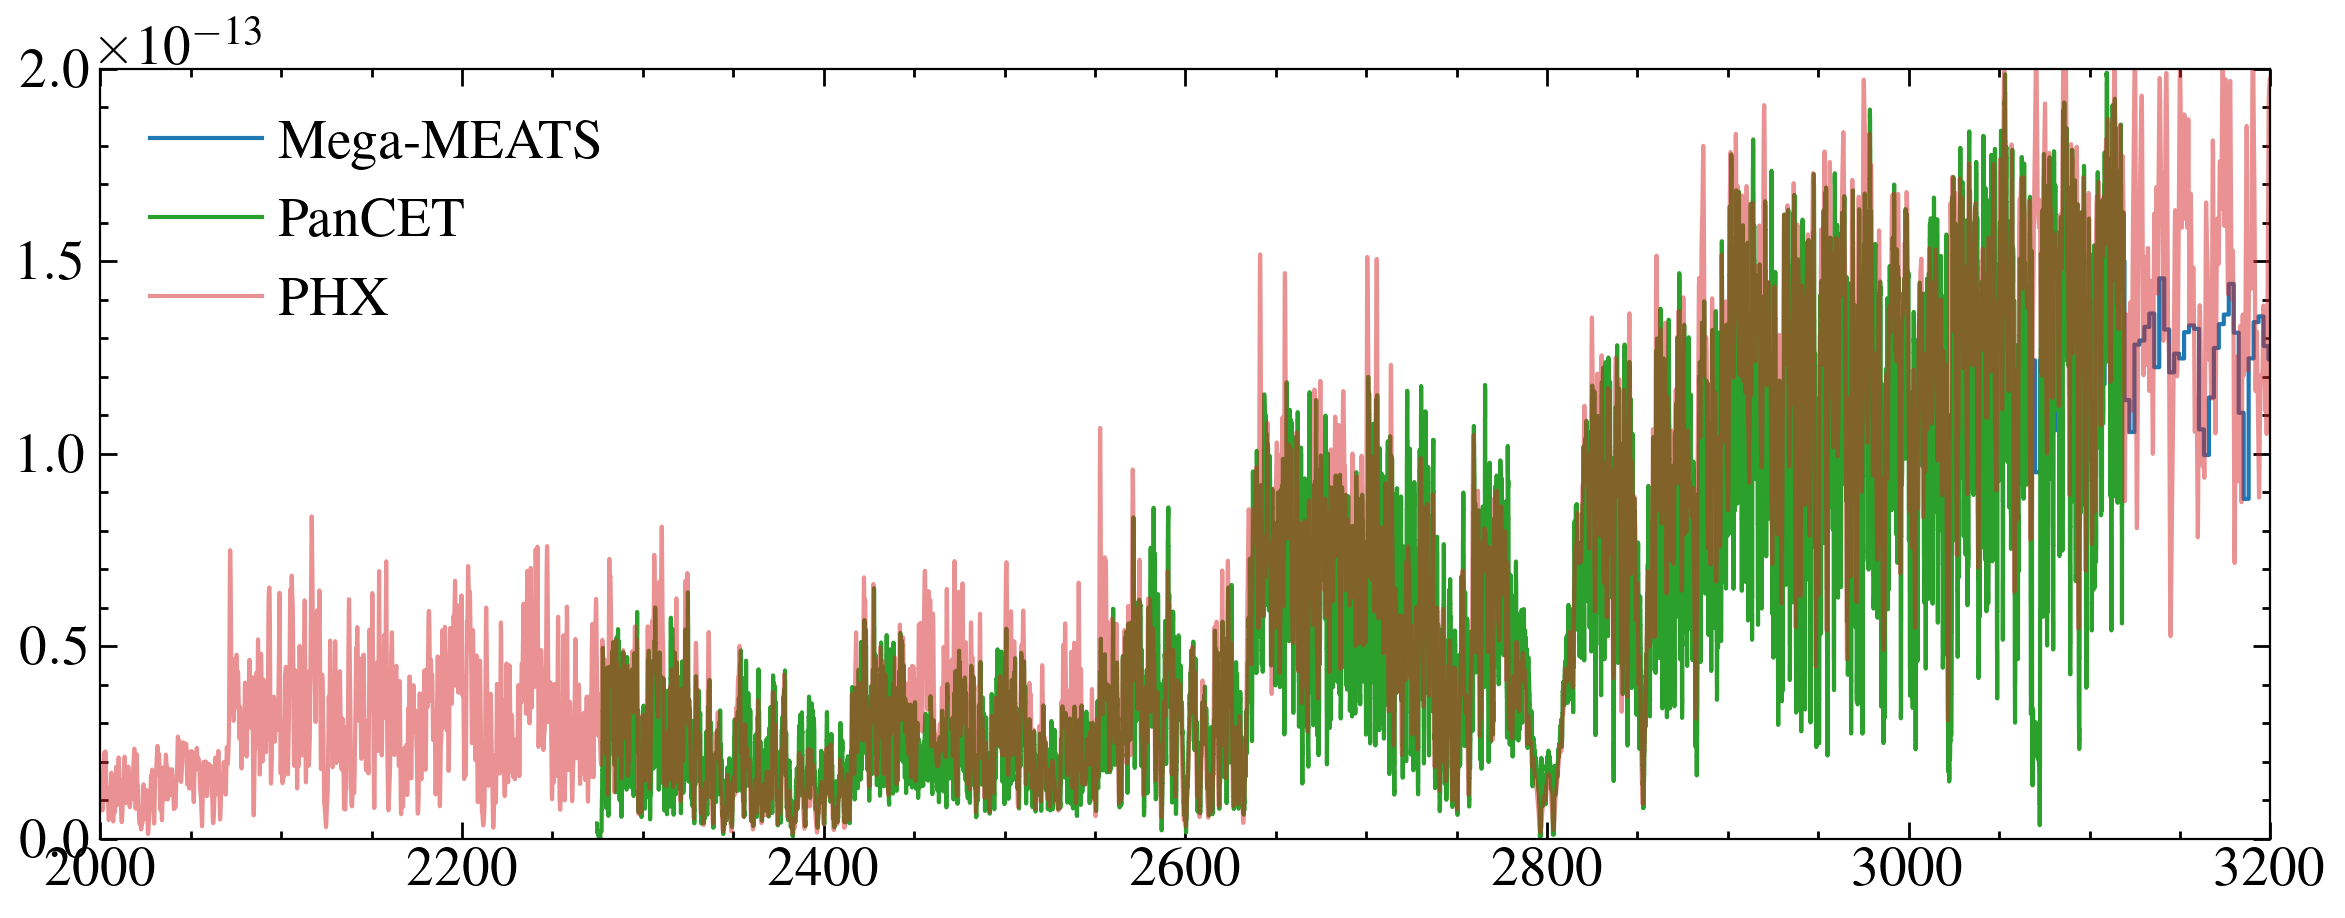

In [197]:
hlsp_x1ds = glob.glob('draft_hlsp/wasp-121/*stis*')

fig, ax = plt.subplots()

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        f = convolve(f,Box1DKernel(2))
        
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw < 1e4)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 10000)
plt.plot(pwi, pfi*1.14, c='C3', label = 'PHX', alpha=0.5)

# ax.set_yscale('log')

ax.set_ylim(0, 2e-13)
ax.set_xlim(2000, 3200)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

/tmp/ipykernel_168871/1184671045.py:19: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


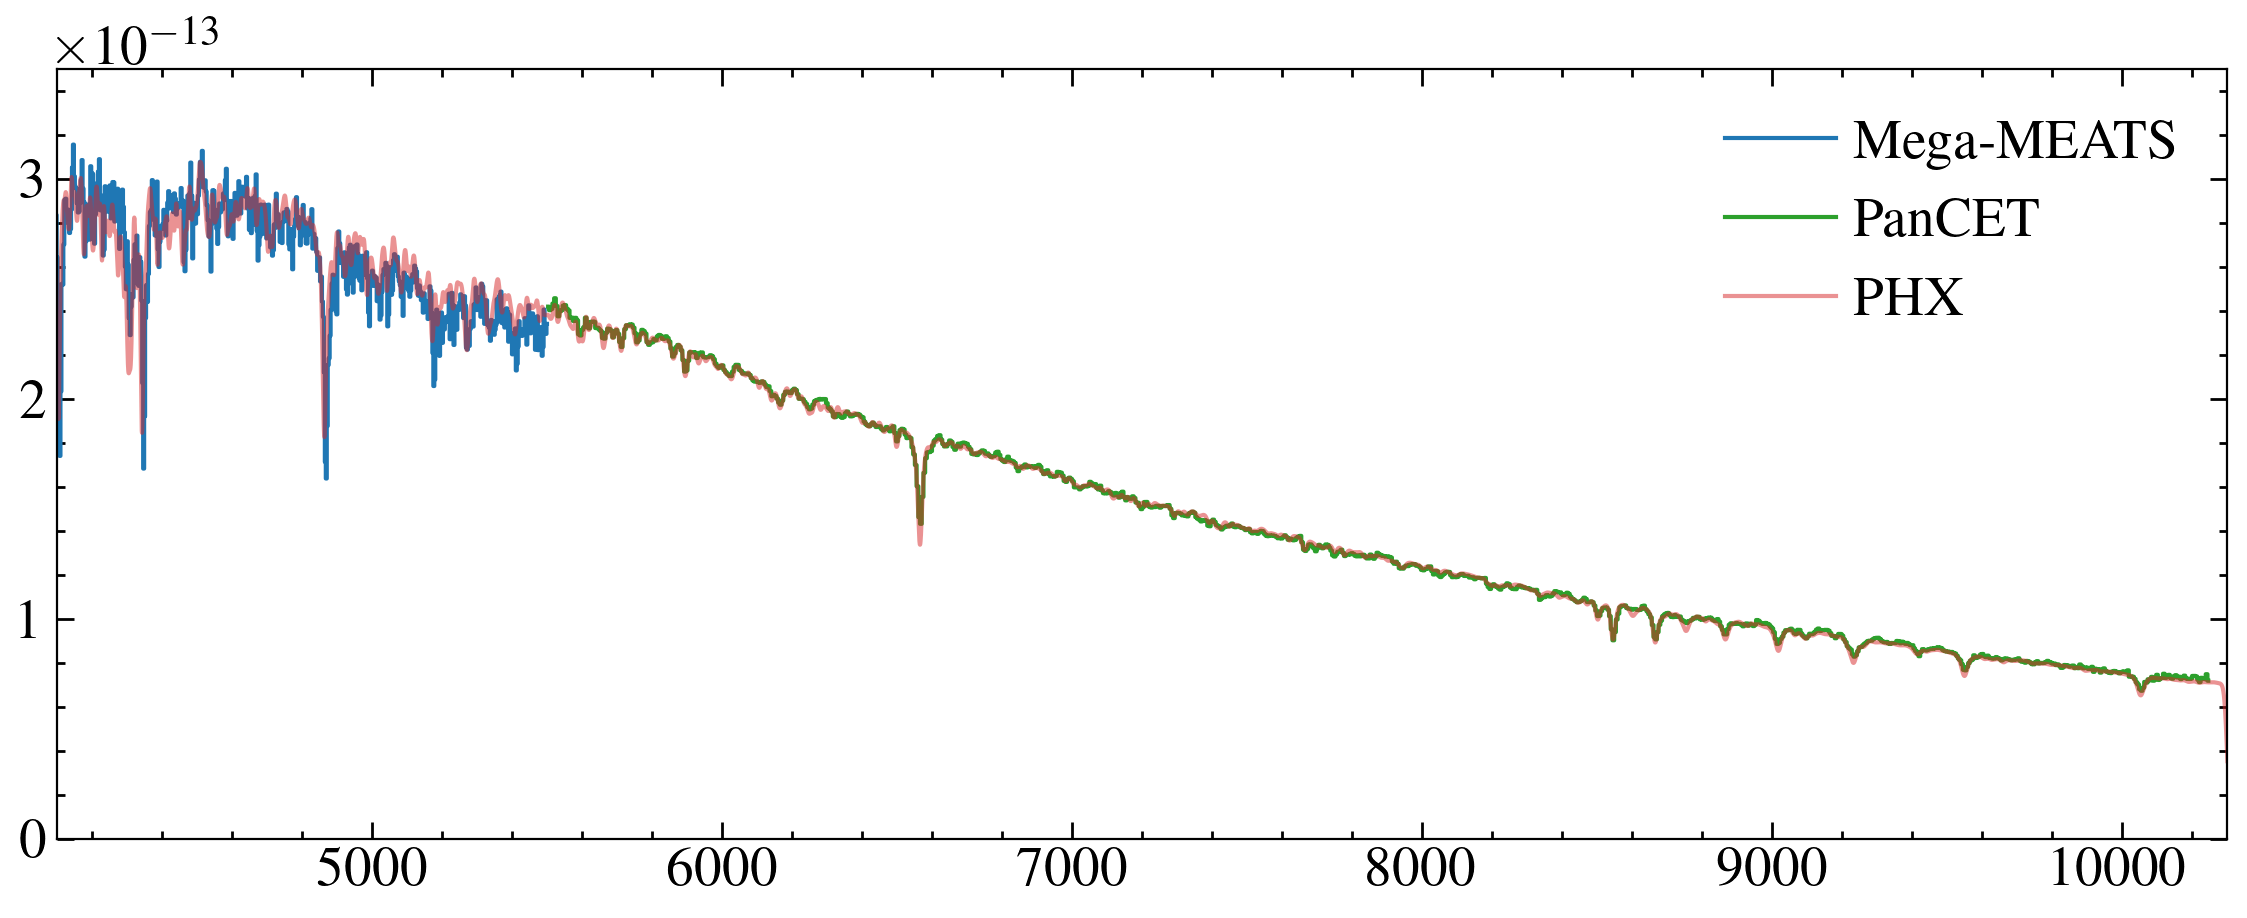

In [190]:

fig, ax = plt.subplots()

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        f = convolve(f,Box1DKernel(2))
        
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw <10300)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi*1.14, 1500)
plt.plot(pwi, pfi, c='C3', label = 'PHX', alpha=0.5)

# ax.set_yscale('log')

ax.set_ylim(0, 3.5e-13)
ax.set_xlim(4100, 10300)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

/tmp/ipykernel_168871/1710734608.py:19: RuntimeWarning: invalid value encountered in divide
  mask = (f/e > 1)


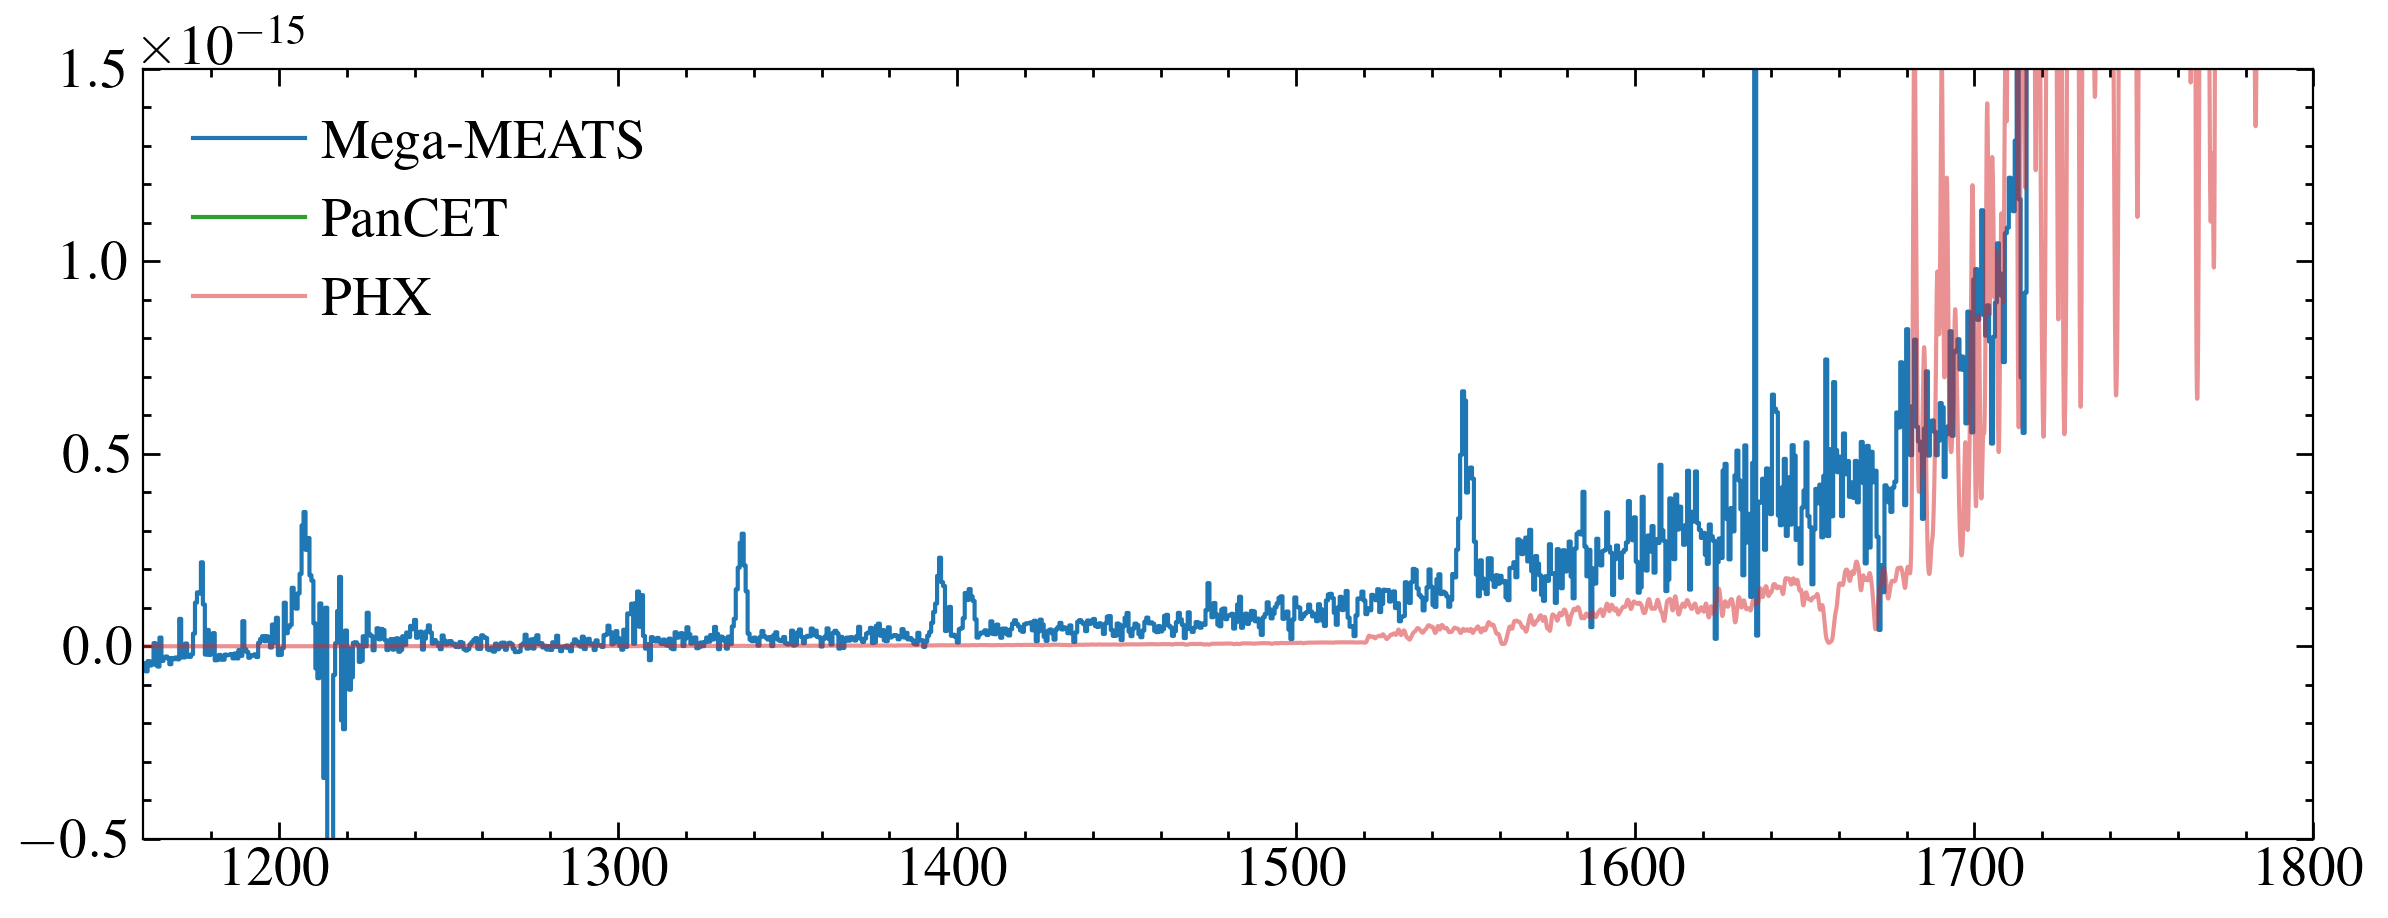

In [192]:

fig, ax = plt.subplots()

for x in hlsp_x1ds:
    grating = fits.getheader(x, 0)['GRATING']
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        c = 'C0'
        label = 'Mega-MEATS'
    if grating == 'G430L':
        mask = (w > 3000) & (w < 5500)
        label = 'Mega-MEATS'
    if grating == 'G750L':
        mask = (w > 5500) 
        c = 'C2'
        label = 'PanCET'
    if grating == 'E230M':
        mask = (f/e > 1) 
        f = convolve(f,Box1DKernel(2))
        
        c= 'C2'
        label = 'PanCET'
    w, f, e = w[mask], f[mask], e[mask]
    
    ax.step(w, f, where='mid', c=c, label=label)

pmask = (pw > 1000) & (pw <10300)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 5000)
plt.plot(pwi, pfi*1.14, c='C3', label = 'PHX', alpha=0.5)

# ax.set_yscale('log')

ax.set_ylim(-0.5e-15, 1.5e-15)
ax.set_xlim(1160, 1800)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

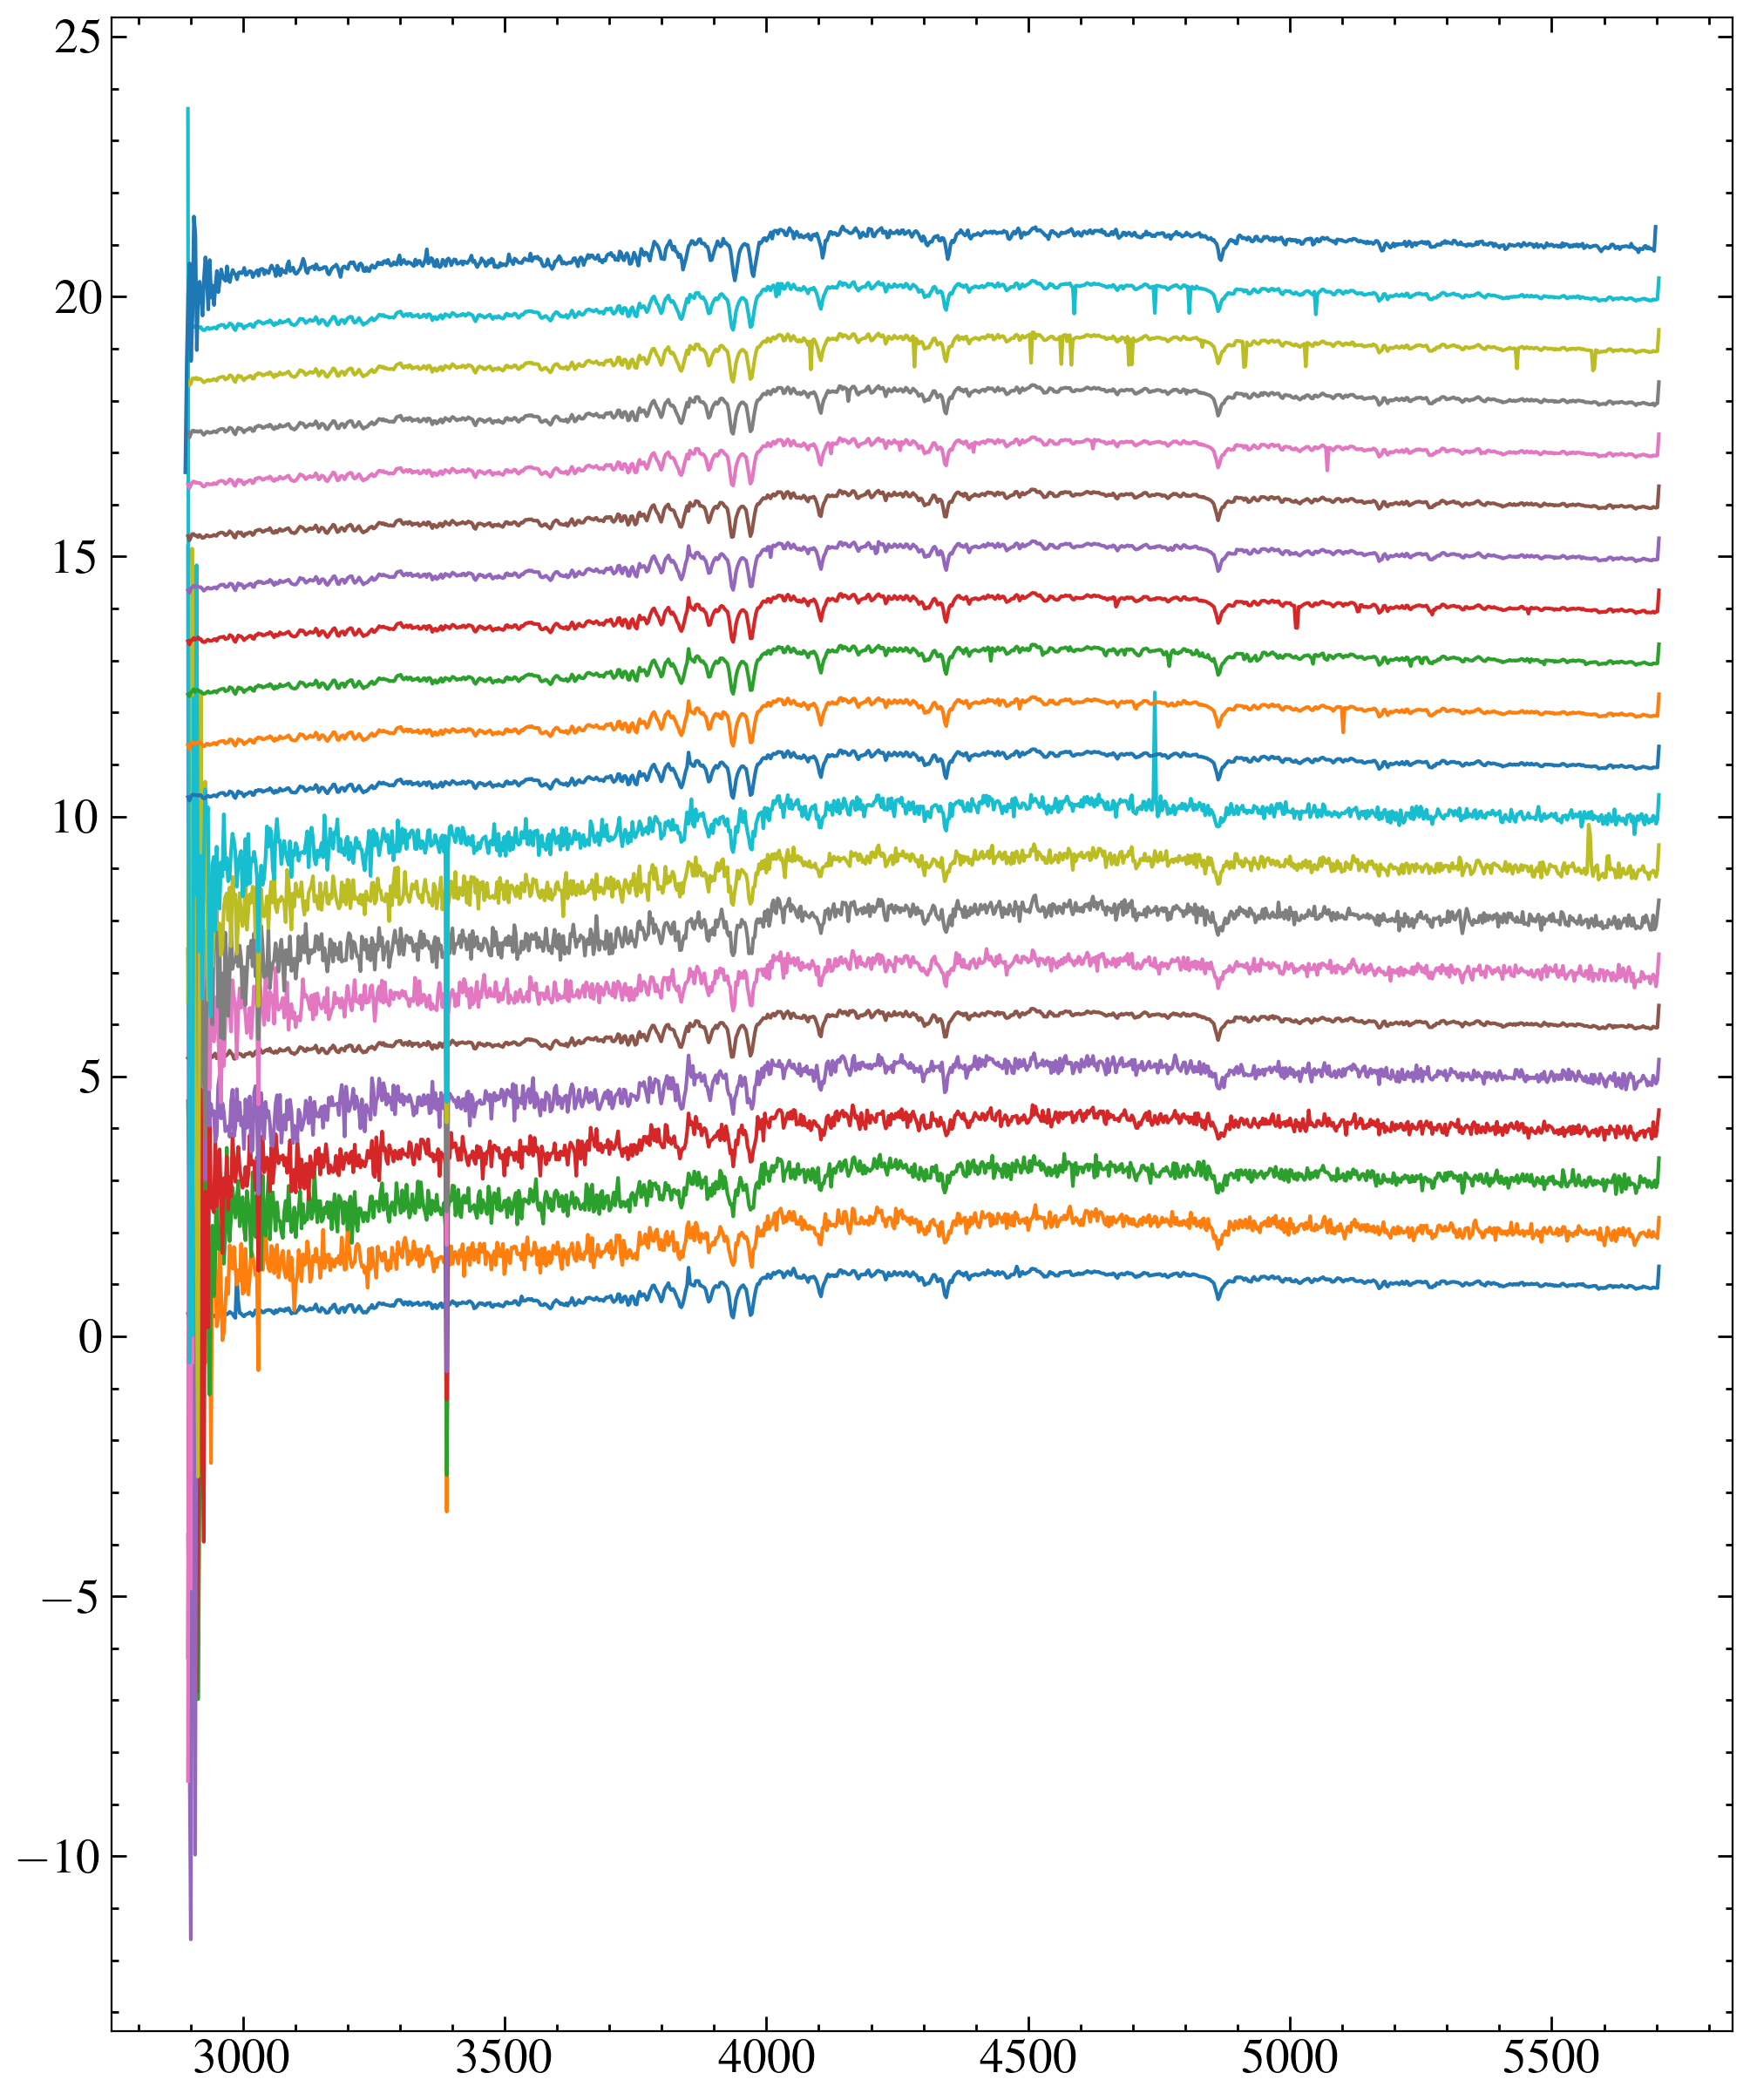

In [199]:
g430ls = []
for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G430L':
        g430ls.append(x)

fig, ax = plt.subplots(figsize=(12, 15))

for i, x in enumerate(g430ls):
    hdr = fits.getheader(x, 0) 
    data = fits.getdata(x, 1)[0]
    w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    norm = np.median(f)
    plt.plot(w, (f/norm)+i)
    root, time = hdr['ROOTNAME'], hdr['TEXPTIME']
    plt.annotate('{} ({:.0f}\,s)'.format(root, time), (10300, i), xycoords='data', va='bottom')
    
# ax.set_xlim(5100, 12000)

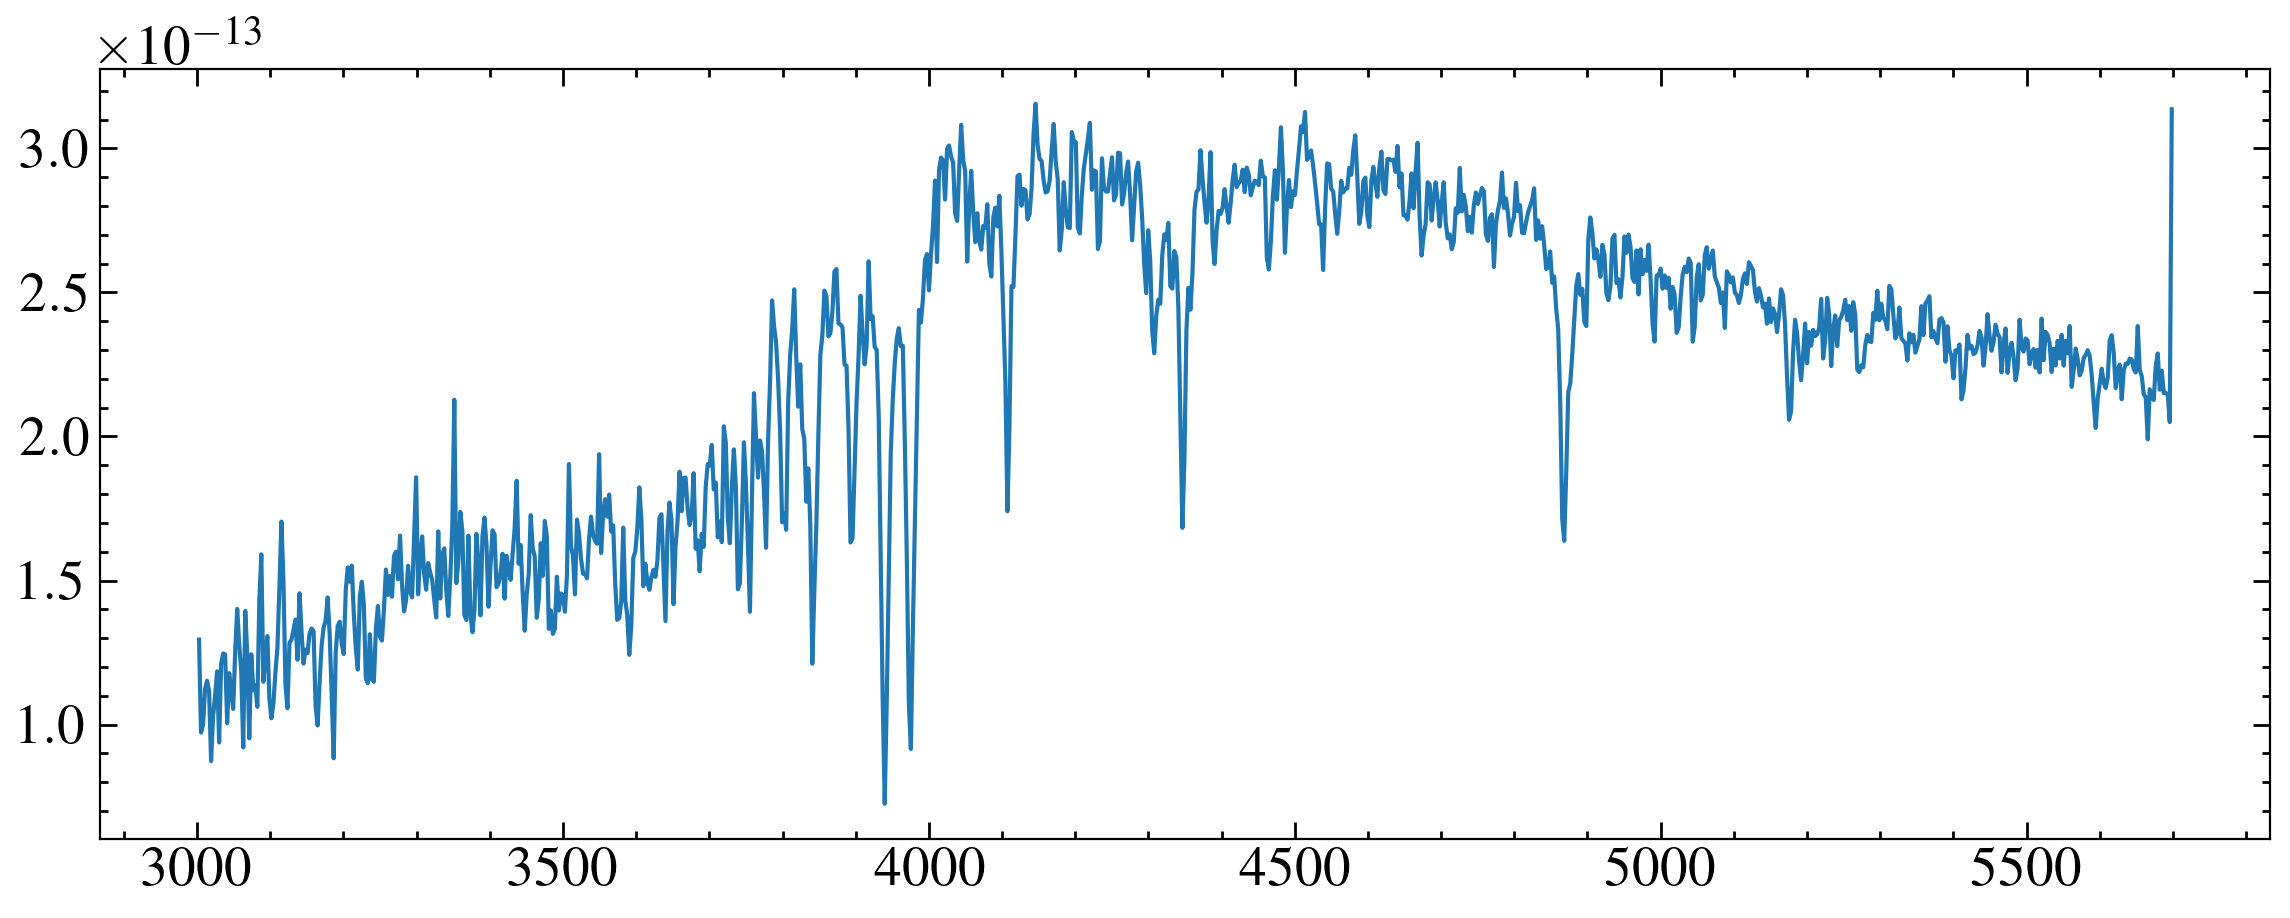

In [201]:
plt.plot(w_opt, f_opt)
optspec = Table([w_opt, f_opt], names=['#WAVELENGTH', 'FLUX'])
optspec.write('misc_data/wasp121_opt.txt', format='ascii.basic')